In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [3]:
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.shape

(7728394, 46)

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Percentage of Missing records in each column

In [7]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
(df.isna().sum()/df.shape[0])*100

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

In [9]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    4.900000e+01   4.300000e+01  4.800000e+01   
50%    3.000000e-02    6.400000e+01   6.200000e+01  6.700000e+01   
75%    4.640000e-01    7.600000e+01   7.500000e+01  8.400000e+01   
max    4.417500e+02    2.070000e+02   2.070000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.587715e+06    7.551296e+06     7.157161e+06       5.524808e+06  
mean   2.953899e+01    9.090376e+00     7.685490e+00       8.407210e-03  
std    1.006190e+00    2.688316e+00     5.424983e+00       1.102246e-01  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.040000e+01       0.000000e+00  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01

***
## Questions on which i will base my analysis:
#### 1. Which states,counties,cities have highest accidents? [X]
#### 2. How is accident severity related to weather condition and visibility? [X]
#### 3. How is accident severity related to presence of a roundabout and turning_loop (these can be potential factors to indicate congestion) ? [X]
#### 4. How is the accident numbers related to presence of either of bumps, Traffic signals, Crossing, Giveway, Junction, No-exit, Railway and stop (these can be potential factors that indicate rough driving) ? [X]
#### 5. How severity is related to amenity? [X]
#### 6. Groupby cities and streets in that city and find which street has highest number of accidents in that city ? [X]
#### 7. How does temp affect accidents that is at what range most accidents take place this can give an idea that in what season most accidents are happening ? [X]
#### 8. In which state in what weather condition do accidents occur the most? [X]
#### 9. How does Temperature and Precipitation affect the accidents? [X]
#### 10. Show the Flow as State with highest accidents then county in that state with highest then city in that county with highest and street in that city with highest. [X]
#### 11. Find the distribution with respect to year, day of week, hour of day, week_day hour and week_end hour? [X]
#### 12. Find what road condition causes most accidents in the top 20 most accident prone states? []
***

In [10]:
df['Visibility(mi)'].describe().astype(int)

count    7551296
mean           9
std            2
min            0
25%           10
50%           10
75%           10
max          140
Name: Visibility(mi), dtype: int64

### Insight: Almost 75% accidents happen at visibility around 10 miles

#### The central value for visibility is 10 so what we can do is that we can replace the values <=10 as low visibility and values >10 as high visibility thus making analysis easier when we combine it with weather conditions to detect which weather with what type of visibility is causing most accidents

### Now for the purpose of my analysis I dont require such a large dataframe with so many colns so lets make a new dataframe with only the colns we will be needed for our EDA
### We will use the following columns: 
- Severity
- State
- City
- County
- Street
- Weather Condition
- Roundabout
- Turning loops
- Amenity
- Visibility
- Temperature
- Bump
- Crossing
- Give way
- Junction
- No exit
- Railway
- Station
- Stop
- Traffic Signal
- Precipitation
- Start time
- Traffic Calming

In [11]:
analysis_df = df[['Severity','Street','City','County','State','Weather_Condition','Visibility(mi)','Temperature(F)','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Signal','Turning_Loop']]

In [12]:
analysis_df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

  Weather_Condition  Visibility(mi)  Temperature(F)  Amenity   Bump  Crossing  \
0        Light Rain            10.0            36.9    False  False     False   
1        Light Rain            10.0            37.9    False  False     False   
2          Overcast            10.0            36.0    False  False     False   
3     Mostly Cloudy             9.0            35.1    False  False     False   
4     Mostly Cloudy             6.0            36.0    False  False     False   

   Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False    False    False       False    False  False   
1     False     False    False    False       False    False  False   
2     False     False    False    False       False    False  False   
3     False     False    False    False       False    False  False   
4     False     False    False    False       False    False  False   

   Traffic_Signal  Turning_Loop  
0           False         False  
1           False         False  
2            True         False  
3           False         False  
4            True         False

In [13]:
analysis_df.shape

(7728394, 20)

In [14]:
analysis_df.isna().sum()

Severity                  0
Street                10869
City                    253
County                    0
State                     0
Weather_Condition    173459
Visibility(mi)       177098
Temperature(F)       163853
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Signal            0
Turning_Loop              0
dtype: int64

In [15]:
(analysis_df.isna().sum()/analysis_df.shape[0])*100

Severity             0.000000
Street               0.140637
City                 0.003274
County               0.000000
State                0.000000
Weather_Condition    2.244438
Visibility(mi)       2.291524
Temperature(F)       2.120143
Amenity              0.000000
Bump                 0.000000
Crossing             0.000000
Give_Way             0.000000
Junction             0.000000
No_Exit              0.000000
Railway              0.000000
Roundabout           0.000000
Station              0.000000
Stop                 0.000000
Traffic_Signal       0.000000
Turning_Loop         0.000000
dtype: float64

#### If we carefully observe here the % of missing values is very low in the columns of Street and City (<1%) so to handle this we can remove the records with null values in them and we should not get affected highly with that data loss

In [16]:
analysis_df.dropna(subset = ['Street','City'],inplace=True)
analysis_df.isna().sum()

/tmp/ipykernel_33/3823207754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.dropna(subset = ['Street','City'],inplace=True)


Severity                  0
Street                    0
City                      0
County                    0
State                     0
Weather_Condition    173147
Visibility(mi)       176748
Temperature(F)       163537
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Signal            0
Turning_Loop              0
dtype: int64

In [17]:
analysis_df.shape

(7717272, 20)

### With that issue resolved we take a look and realise that the columns Weather_Condition, Visibility(mi) and Temperature(F) have 2.24%, 2.29% and 2.12% missing values respectively.
### Weather Condition is a categorical column so we will replace the missing values with the most common weather condition that is the mode.
### Visibility(mi) is a float value column or numerical coln so we will replace the missing values with the median value of that column
### Temperature(F) is also a float value column so we will treat it the same way as Visibility(mi) column

In [18]:
analysis_df.Weather_Condition.mode()

0    Fair
Name: Weather_Condition, dtype: object

In [19]:
analysis_df['Visibility(mi)'].median()

10.0

In [20]:
analysis_df['Temperature(F)'].median()

64.0

### Here we got the mode value of Weather_Condition is Fair and median of Visibility(mi) and Temperature(F) are 10.0 and 64.0 respectively

#### Now lets replace the missing Weather_Condition values with the mode value i.e. Fair, Visibility(mi) missing values with 10.0 and Temperature(F) missing values with 64.0

In [21]:
analysis_df.Weather_Condition.fillna('Fair',inplace=True)

/tmp/ipykernel_33/771315537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  analysis_df.Weather_Condition.fillna('Fair',inplace=True)
/tmp/ipykernel_33/771315537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.Weather_Condition.fillna('Fair',inplace=True)


In [22]:
analysis_df['Visibility(mi)'].fillna(10.0,inplace=True)

/tmp/ipykernel_33/1860471422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  analysis_df['Visibility(mi)'].fillna(10.0,inplace=True)
/tmp/ipykernel_33/1860471422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['Visibility(mi)'].fillna(10.0,inplace=True)


In [23]:
analysis_df['Temperature(F)'].fillna(64.0,inplace=True)

/tmp/ipykernel_33/1478175497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  analysis_df['Temperature(F)'].fillna(64.0,inplace=True)
/tmp/ipykernel_33/1478175497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['Temperature(F)'].fillna(64.0,inplace=True)


### Lets check the progress ...

In [24]:
analysis_df.isna().sum()

Severity             0
Street               0
City                 0
County               0
State                0
Weather_Condition    0
Visibility(mi)       0
Temperature(F)       0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Signal       0
Turning_Loop         0
dtype: int64

In [25]:
analysis_df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

  Weather_Condition  Visibility(mi)  Temperature(F)  Amenity   Bump  Crossing  \
0        Light Rain            10.0            36.9    False  False     False   
1        Light Rain            10.0            37.9    False  False     False   
2          Overcast            10.0            36.0    False  False     False   
3     Mostly Cloudy             9.0            35.1    False  False     False   
4     Mostly Cloudy             6.0            36.0    False  False     False   

   Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False    False    False       False    False  False   
1     False     False    False    False       False    False  False   
2     False     False    False    False       False    False  False   
3     False     False    False    False       False    False  False   
4     False     False    False    False       False    False  False   

   Traffic_Signal  Turning_Loop  
0           False         False  
1           False         False  
2            True         False  
3           False         False  
4            True         False

### Now we can change the Boolean Values of True and False with Yes and No in the Boolean Columns like Bump, Crossing, etc for ease of categorization

In [26]:
#analysis_df[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Signal','Turning_Loop']] = analysis_df[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Signal','Turning_Loop']].replace([True,False],['Yes','No'])

In [27]:
analysis_df.sample(5)

Severity             Street           City       County State  \
6429691         2       E Palmer Ave    Tallahassee         Leon    FL   
4121213         2         Skokie Hwy  Highland Park         Lake    IL   
5131988         2        W Parker Rd     Greenville   Greenville    SC   
2921068         3     Grange Hall Rd          Holly      Oakland    MI   
6897467         2   W Sugar Creek Rd      Charlotte  Mecklenburg    NC   

        Weather_Condition  Visibility(mi)  Temperature(F)  Amenity   Bump  \
6429691            Cloudy            10.0            42.0    False  False   
4121213     Mostly Cloudy            10.0            69.0    False  False   
5131988            Cloudy            10.0            65.0    False  False   
2921068          Overcast             4.0            30.9    False  False   
6897467              Fair            10.0            52.0    False  False   

         Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station  \
6429691      True     False     False    False    False       False    False   
4121213     False     False     False    False    False       False    False   
5131988     False     False     False    False    False       False    False   
2921068     False     False     False    False    False       False    False   
6897467     False     False     False    False    False       False    False   

          Stop  Traffic_Signal  Turning_Loop  
6429691  False           False         False  
4121213  False           False         False  
5131988  False           False         False  
2921068  False           False         False  
6897467  False           False         False

### Now we have to process the Visibility column to show Low for values <=10.0 and High for values >10.0

In [28]:
visibility_df = analysis_df['Visibility(mi)']
visibility_df = np.where(visibility_df<=10.0,'Low','High')
analysis_df['Visibility(mi)'] = visibility_df

/tmp/ipykernel_33/3552575801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['Visibility(mi)'] = visibility_df


In [29]:
analysis_df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

  Weather_Condition Visibility(mi)  Temperature(F)  Amenity   Bump  Crossing  \
0        Light Rain            Low            36.9    False  False     False   
1        Light Rain            Low            37.9    False  False     False   
2          Overcast            Low            36.0    False  False     False   
3     Mostly Cloudy            Low            35.1    False  False     False   
4     Mostly Cloudy            Low            36.0    False  False     False   

   Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False    False    False       False    False  False   
1     False     False    False    False       False    False  False   
2     False     False    False    False       False    False  False   
3     False     False    False    False       False    False  False   
4     False     False    False    False       False    False  False   

   Traffic_Signal  Turning_Loop  
0           False         False  
1           False         False  
2            True         False  
3           False         False  
4            True         False

### Processing and cleaning are done so now we can start the next phase of actually analysing the data

### Lets start by simply analyzing the relation of number of accidents with respect to Street, City, County, State, Weather_Condition, Visibility(mi) 

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Street'>

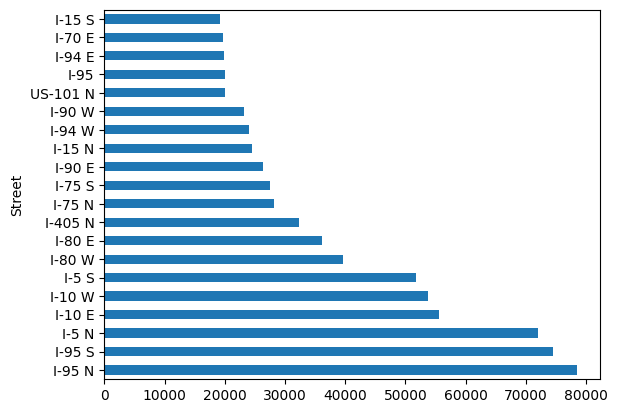

In [31]:
analysis_df.Street.value_counts()[:20].plot.barh()

<Axes: ylabel='City'>

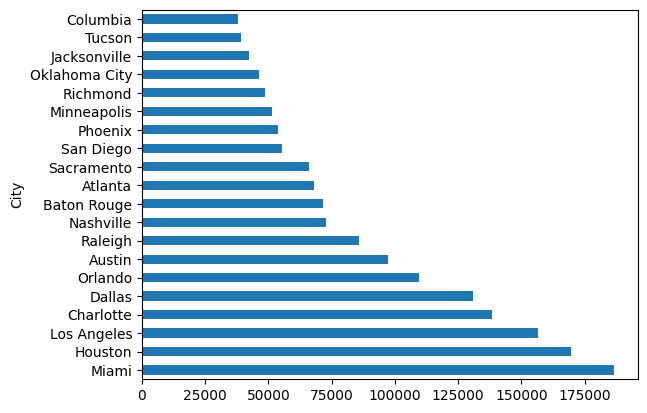

In [32]:
analysis_df.City.value_counts()[:20].plot.barh()

<Axes: ylabel='County'>

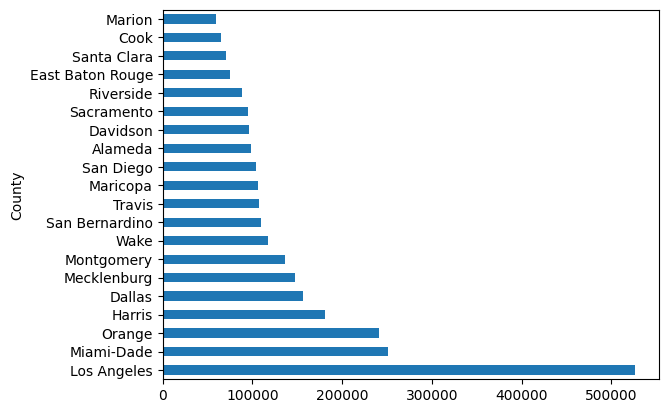

In [33]:
analysis_df.County.value_counts()[:20].plot.barh()

<Axes: ylabel='State'>

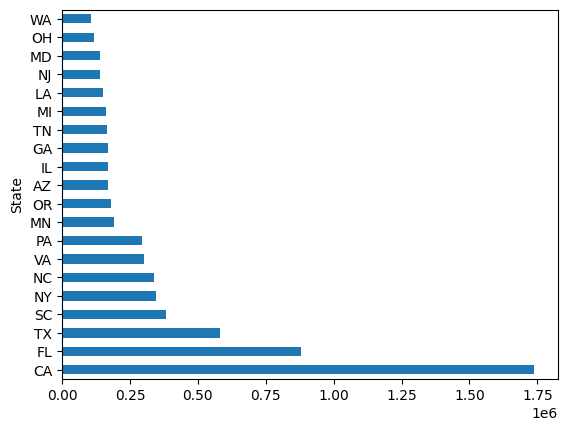

In [34]:
analysis_df.State.value_counts()[:20].plot.barh()

<Axes: ylabel='Weather_Condition'>

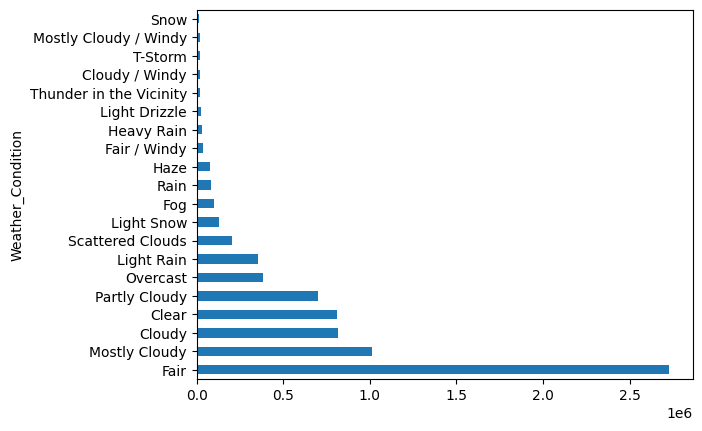

In [35]:
analysis_df.Weather_Condition.value_counts()[:20].plot.barh()

<Axes: ylabel='Visibility(mi)'>

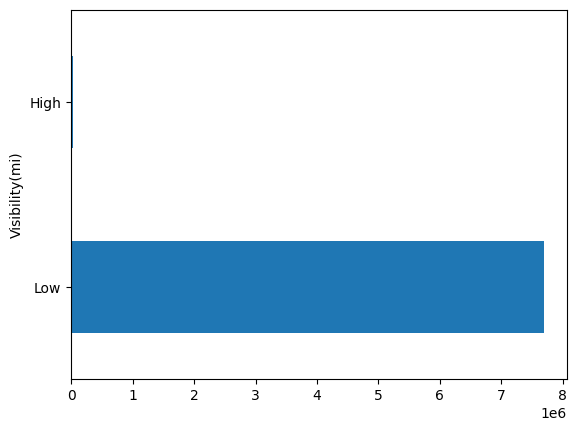

In [36]:
analysis_df['Visibility(mi)'].value_counts()[:20].plot.barh()

#### To find the effect of Temperature(F) lets make the column into bins of 10 deg diff each starting from -90 to 210 degrees Fahrenheit 

In [37]:
analysis_df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

  Weather_Condition Visibility(mi)  Temperature(F)  Amenity   Bump  Crossing  \
0        Light Rain            Low            36.9    False  False     False   
1        Light Rain            Low            37.9    False  False     False   
2          Overcast            Low            36.0    False  False     False   
3     Mostly Cloudy            Low            35.1    False  False     False   
4     Mostly Cloudy            Low            36.0    False  False     False   

   Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False    False    False       False    False  False   
1     False     False    False    False       False    False  False   
2     False     False    False    False       False    False  False   
3     False     False    False    False       False    False  False   
4     False     False    False    False       False    False  False   

   Traffic_Signal  Turning_Loop  
0           False         False  
1           False         False  
2            True         False  
3           False         False  
4            True         False

In [38]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(-90, 210, 10)]
analysis_df['Temperature_ranges(F)'] = pd.cut(analysis_df['Temperature(F)'],np.arange(-90,220,10),labels=labels)

/tmp/ipykernel_33/3860332829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['Temperature_ranges(F)'] = pd.cut(analysis_df['Temperature(F)'],np.arange(-90,220,10),labels=labels)


In [39]:
analysis_df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

  Weather_Condition Visibility(mi)  Temperature(F)  Amenity   Bump  ...  \
0        Light Rain            Low            36.9    False  False  ...   
1        Light Rain            Low            37.9    False  False  ...   
2          Overcast            Low            36.0    False  False  ...   
3     Mostly Cloudy            Low            35.1    False  False  ...   
4     Mostly Cloudy            Low            36.0    False  False  ...   

   Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False    False    False       False    False  False   
1     False     False    False    False       False    False  False   
2     False     False    False    False       False    False  False   
3     False     False    False    False       False    False  False   
4     False     False    False    False       False    False  False   

   Traffic_Signal  Turning_Loop  Temperature_ranges(F)  
0           False         False                30 - 39  
1           False         False                30 - 39  
2            True         False                30 - 39  
3           False         False                30 - 39  
4            True         False                30 - 39  

[5 rows x 21 columns]

<Axes: ylabel='Temperature_ranges(F)'>

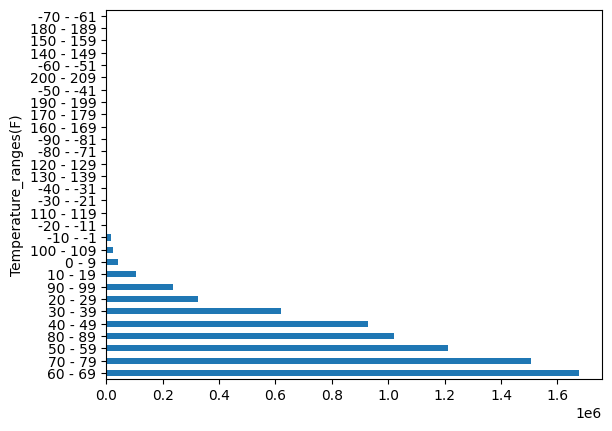

In [40]:
analysis_df['Temperature_ranges(F)'].value_counts().plot.barh()

<Axes: ylabel='Severity'>

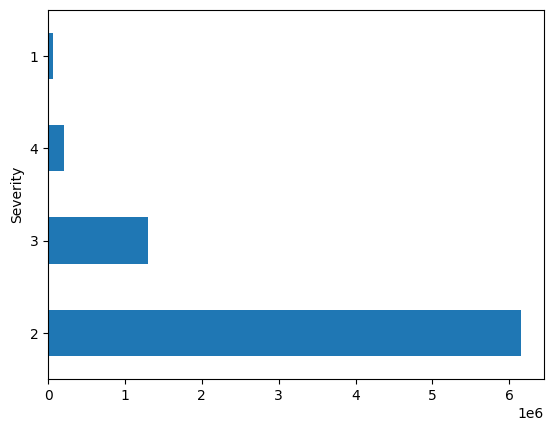

In [41]:
analysis_df.Severity.value_counts().plot.barh()

### Insights from the graphs: (Forced to take top 20 values as data is too big to process)
#### - Most accidents are of Severity value of 2
#### - Most accidents have occured at temp range of 60-69 degrees fahrenheit(15-20 deg C)
#### - Low Visibility is causing most accidents as expected
#### - Most accidents take place when weather condition is fair
#### - Most accidents have occured in states of CA,FL and TX
#### - Most accidents have occured in counties of Los Angeles, Miami-Dade and Orange
#### - Most accidents have occured in the cities of Miami, Houston and Los Angeles
#### - Most accidents have occured on the streets of I-95 N, I-95 S and I-5 N

In [42]:
analysis_df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

  Weather_Condition Visibility(mi)  Temperature(F)  Amenity   Bump  ...  \
0        Light Rain            Low            36.9    False  False  ...   
1        Light Rain            Low            37.9    False  False  ...   
2          Overcast            Low            36.0    False  False  ...   
3     Mostly Cloudy            Low            35.1    False  False  ...   
4     Mostly Cloudy            Low            36.0    False  False  ...   

   Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False    False    False       False    False  False   
1     False     False    False    False       False    False  False   
2     False     False    False    False       False    False  False   
3     False     False    False    False       False    False  False   
4     False     False    False    False       False    False  False   

   Traffic_Signal  Turning_Loop  Temperature_ranges(F)  
0           False         False                30 - 39  
1           False         False                30 - 39  
2            True         False                30 - 39  
3           False         False                30 - 39  
4            True         False                30 - 39  

[5 rows x 21 columns]

In [43]:
analysis_df.columns

Index(['Severity', 'Street', 'City', 'County', 'State', 'Weather_Condition',
       'Visibility(mi)', 'Temperature(F)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Signal', 'Turning_Loop', 'Temperature_ranges(F)'],
      dtype='object')

### Now to process the values to find possibility of rash driving we can take the logical OR between the colns Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Station, Stop and Traffic_Signal 

In [44]:
analysis_df['Rash_Driving'] = analysis_df.Bump | analysis_df.Crossing | analysis_df.Give_Way | analysis_df.Junction | analysis_df.No_Exit | analysis_df.Railway | analysis_df.Station | analysis_df.Stop | analysis_df.Traffic_Signal

/tmp/ipykernel_33/2591055900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['Rash_Driving'] = analysis_df.Bump | analysis_df.Crossing | analysis_df.Give_Way | analysis_df.Junction | analysis_df.No_Exit | analysis_df.Railway | analysis_df.Station | analysis_df.Stop | analysis_df.Traffic_Signal


In [45]:
analysis_df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

  Weather_Condition Visibility(mi)  Temperature(F)  Amenity   Bump  ...  \
0        Light Rain            Low            36.9    False  False  ...   
1        Light Rain            Low            37.9    False  False  ...   
2          Overcast            Low            36.0    False  False  ...   
3     Mostly Cloudy            Low            35.1    False  False  ...   
4     Mostly Cloudy            Low            36.0    False  False  ...   

   Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Signal  \
0     False    False    False       False    False  False           False   
1     False    False    False       False    False  False           False   
2     False    False    False       False    False  False            True   
3     False    False    False       False    False  False           False   
4     False    False    False       False    False  False            True   

   Turning_Loop  Temperature_ranges(F)  Rash_Driving  
0         False                30 - 39         False  
1         False                30 - 39         False  
2         False                30 - 39          True  
3         False                30 - 39         False  
4         False                30 - 39          True  

[5 rows x 22 columns]

In [46]:
analysis_df.Rash_Driving.value_counts()

Rash_Driving
False    5445865
True     2271407
Name: count, dtype: int64

<Axes: ylabel='Rash_Driving'>

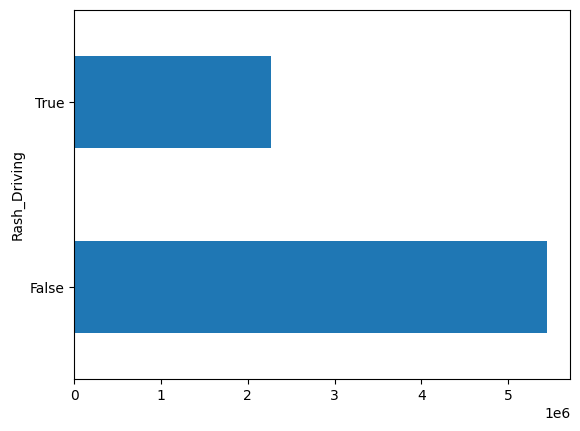

In [47]:
analysis_df.Rash_Driving.value_counts().plot.barh()

#### Insight from this graph: Interestingly these factors that might indicate rash driving display that in most cases accidents happen when rash driving is not involved

### Lets try and see the distribution with respect to Congestion which we can get by taking a logical OR between Roundabout and Turning_Loop

In [48]:
analysis_df['Congestion_Driving'] = analysis_df.Roundabout | analysis_df.Turning_Loop

/tmp/ipykernel_33/3593095714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['Congestion_Driving'] = analysis_df.Roundabout | analysis_df.Turning_Loop


In [49]:
analysis_df.head()

Severity                     Street          City      County State  \
0         3                     I-70 E        Dayton  Montgomery    OH   
1         2                   Brice Rd  Reynoldsburg    Franklin    OH   
2         2             State Route 32  Williamsburg    Clermont    OH   
3         3                     I-75 S        Dayton  Montgomery    OH   
4         2  Miamisburg Centerville Rd        Dayton  Montgomery    OH   

  Weather_Condition Visibility(mi)  Temperature(F)  Amenity   Bump  ...  \
0        Light Rain            Low            36.9    False  False  ...   
1        Light Rain            Low            37.9    False  False  ...   
2          Overcast            Low            36.0    False  False  ...   
3     Mostly Cloudy            Low            35.1    False  False  ...   
4     Mostly Cloudy            Low            36.0    False  False  ...   

   No_Exit  Railway  Roundabout  Station   Stop  Traffic_Signal  Turning_Loop  \
0    False    False       False    False  False           False         False   
1    False    False       False    False  False           False         False   
2    False    False       False    False  False            True         False   
3    False    False       False    False  False           False         False   
4    False    False       False    False  False            True         False   

   Temperature_ranges(F)  Rash_Driving  Congestion_Driving  
0                30 - 39         False               False  
1                30 - 39         False               False  
2                30 - 39          True               False  
3                30 - 39         False               False  
4                30 - 39          True               False  

[5 rows x 23 columns]

In [50]:
analysis_df.Congestion_Driving.value_counts()

Congestion_Driving
False    7717023
True         249
Name: count, dtype: int64

<Axes: ylabel='Congestion_Driving'>

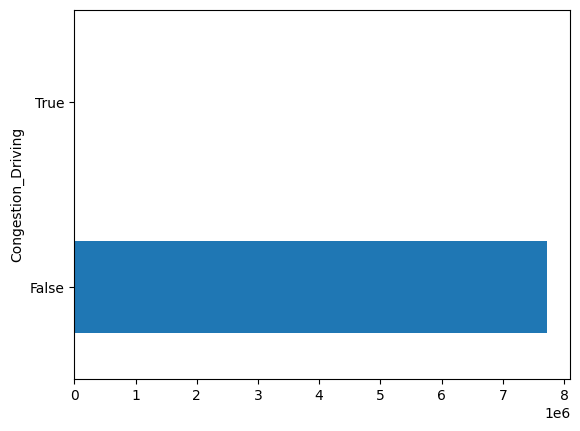

In [51]:
analysis_df.Congestion_Driving.value_counts().plot.barh()

#### Insight: Seems like accidents are more prone in absence of roundabouts or turning points 

#### Now we can combine the columns of Rash_Driving and Weather_Condition to find out the Weather condition that causes most accidents when rash driving is true

In [52]:
rash_weather_df = analysis_df[analysis_df['Rash_Driving']==True]['Weather_Condition']

<Axes: ylabel='Weather_Condition'>

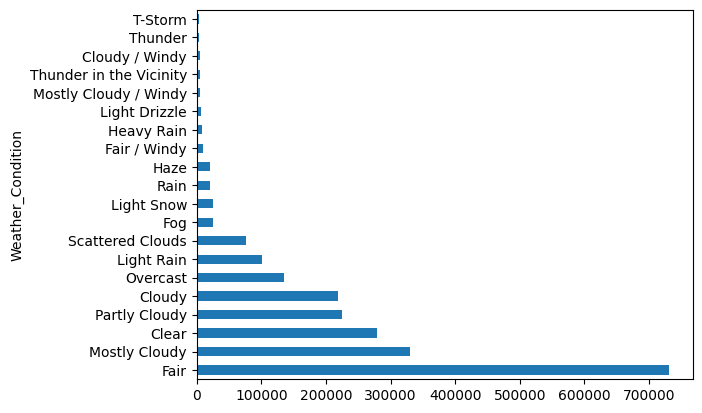

In [53]:
rash_weather_df.value_counts()[:20].plot.barh()

#### Weather condition when fair still has most accidents when there is possibility of rash driving involved

#### Now lets try the opposite and find out what weather condition seems to have high accidents when no rash driving are involved

In [54]:
no_rash_weather_df = analysis_df[analysis_df['Rash_Driving']==False]['Weather_Condition']

<Axes: ylabel='Weather_Condition'>

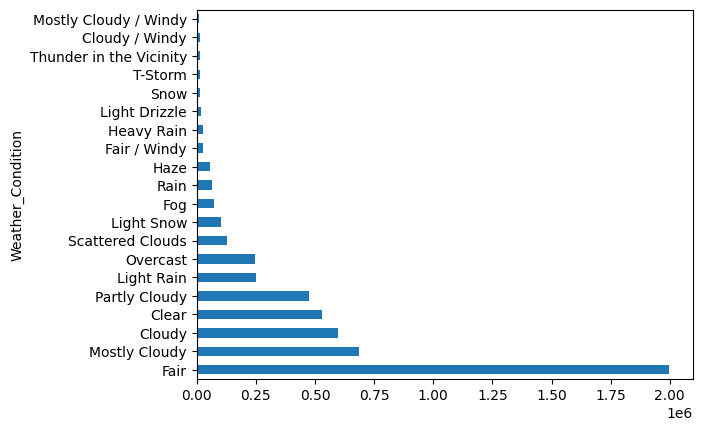

In [55]:
no_rash_weather_df.value_counts()[:20].plot.barh()

#### Fair still has highest number of accidents

#### Qn: At what severity level was most amenity caused , i.e. Amenity = True ?

In [56]:
severity_Amenity_df = analysis_df[analysis_df['Amenity']==True]['Severity']

<Axes: ylabel='Severity'>

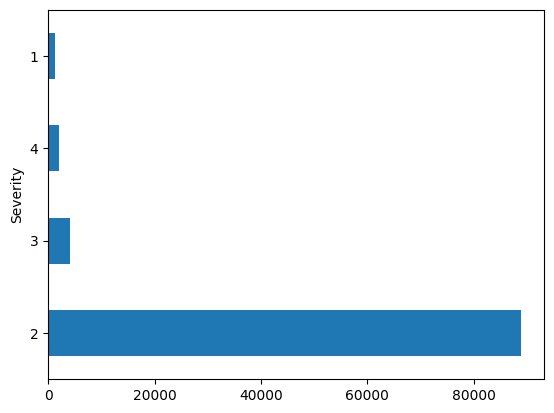

In [57]:
severity_Amenity_df.value_counts().plot.barh()

#### Insight: Most amenities are caused by accidents of severity value 2

#### Qn: At what weather condition was most high severity accidents are caused , i.e. Severity = 3 or 4 ?

In [58]:
high_severity_Weather_df = analysis_df[(analysis_df['Severity']==4) | (analysis_df['Severity']==3)]['Weather_Condition']

<Axes: ylabel='Weather_Condition'>

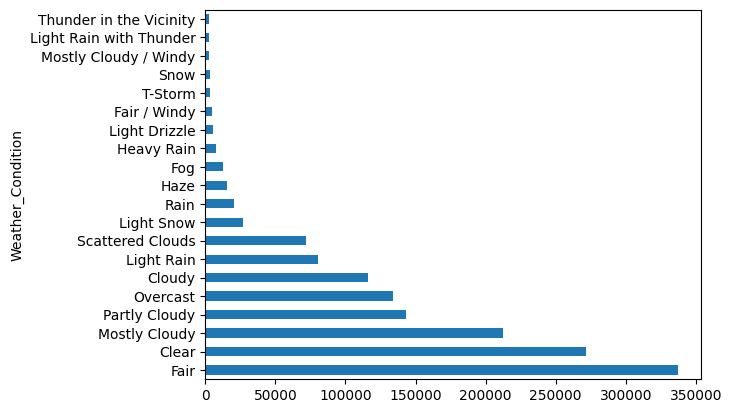

In [59]:
high_severity_Weather_df.value_counts()[:20].plot.barh()

#### Insight: Most high severity accidents are caused when weather condition is Fair

### Lets find the relation between Weather Condition and Severity when Visibility is Low

In [60]:
visibility_low_df = analysis_df[analysis_df['Visibility(mi)']=='Low'][['Severity','Weather_Condition']]

In [61]:
top_20_conditions = visibility_low_df['Weather_Condition'].value_counts().nlargest(20).index

In [62]:
filtered_df = visibility_low_df[visibility_low_df['Weather_Condition'].isin(top_20_conditions)]

In [63]:
filtered_df.head(3)

Severity Weather_Condition
0         3        Light Rain
1         2        Light Rain
2         2          Overcast

<Axes: xlabel='Weather_Condition', ylabel='count'>

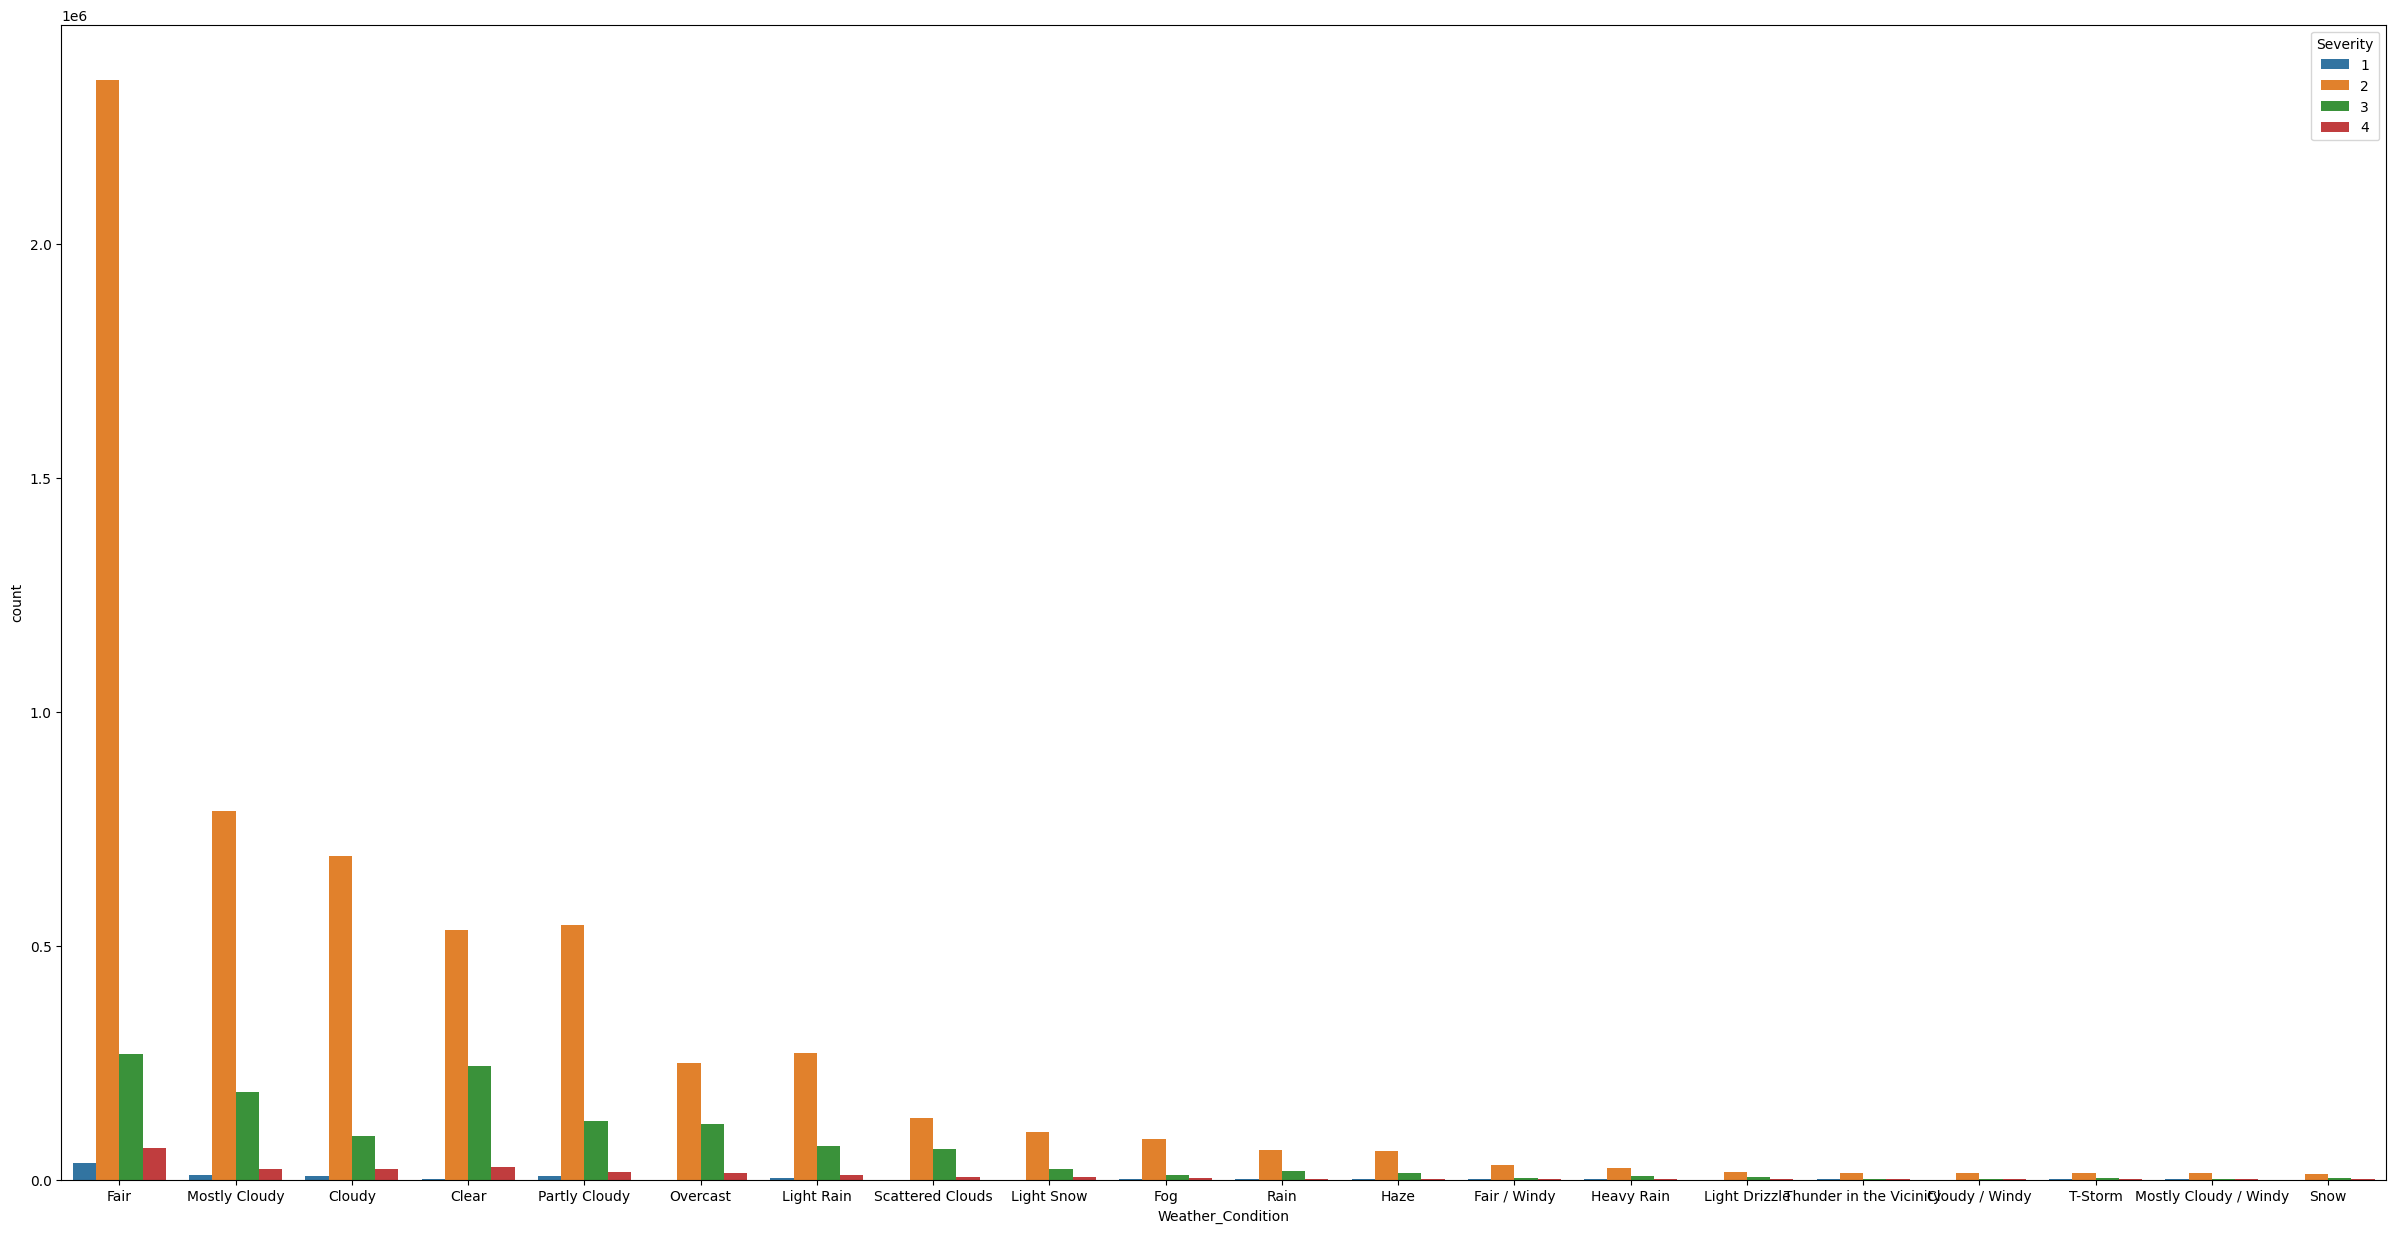

In [64]:
plt.figure(figsize=(30, 15))
sns.countplot(data=filtered_df, x='Weather_Condition', hue='Severity', order=top_20_conditions)

#### Insight: Even with visibility as low, Fair condition has highest number of accidents of severity 2

### Lets find the relation between Weather Condition and Severity when Visibility is High

In [65]:
visibility_high_df = analysis_df[analysis_df['Visibility(mi)']=='High'][['Severity','Weather_Condition']]

In [66]:
top_20_conditions = visibility_high_df['Weather_Condition'].value_counts().nlargest(20).index

In [67]:
filtered_df = visibility_high_df[visibility_high_df['Weather_Condition'].isin(top_20_conditions)]

In [68]:
filtered_df.head(3)

Severity Weather_Condition
764         2             Clear
777         2             Clear
794         3             Clear

<Axes: xlabel='Weather_Condition', ylabel='count'>

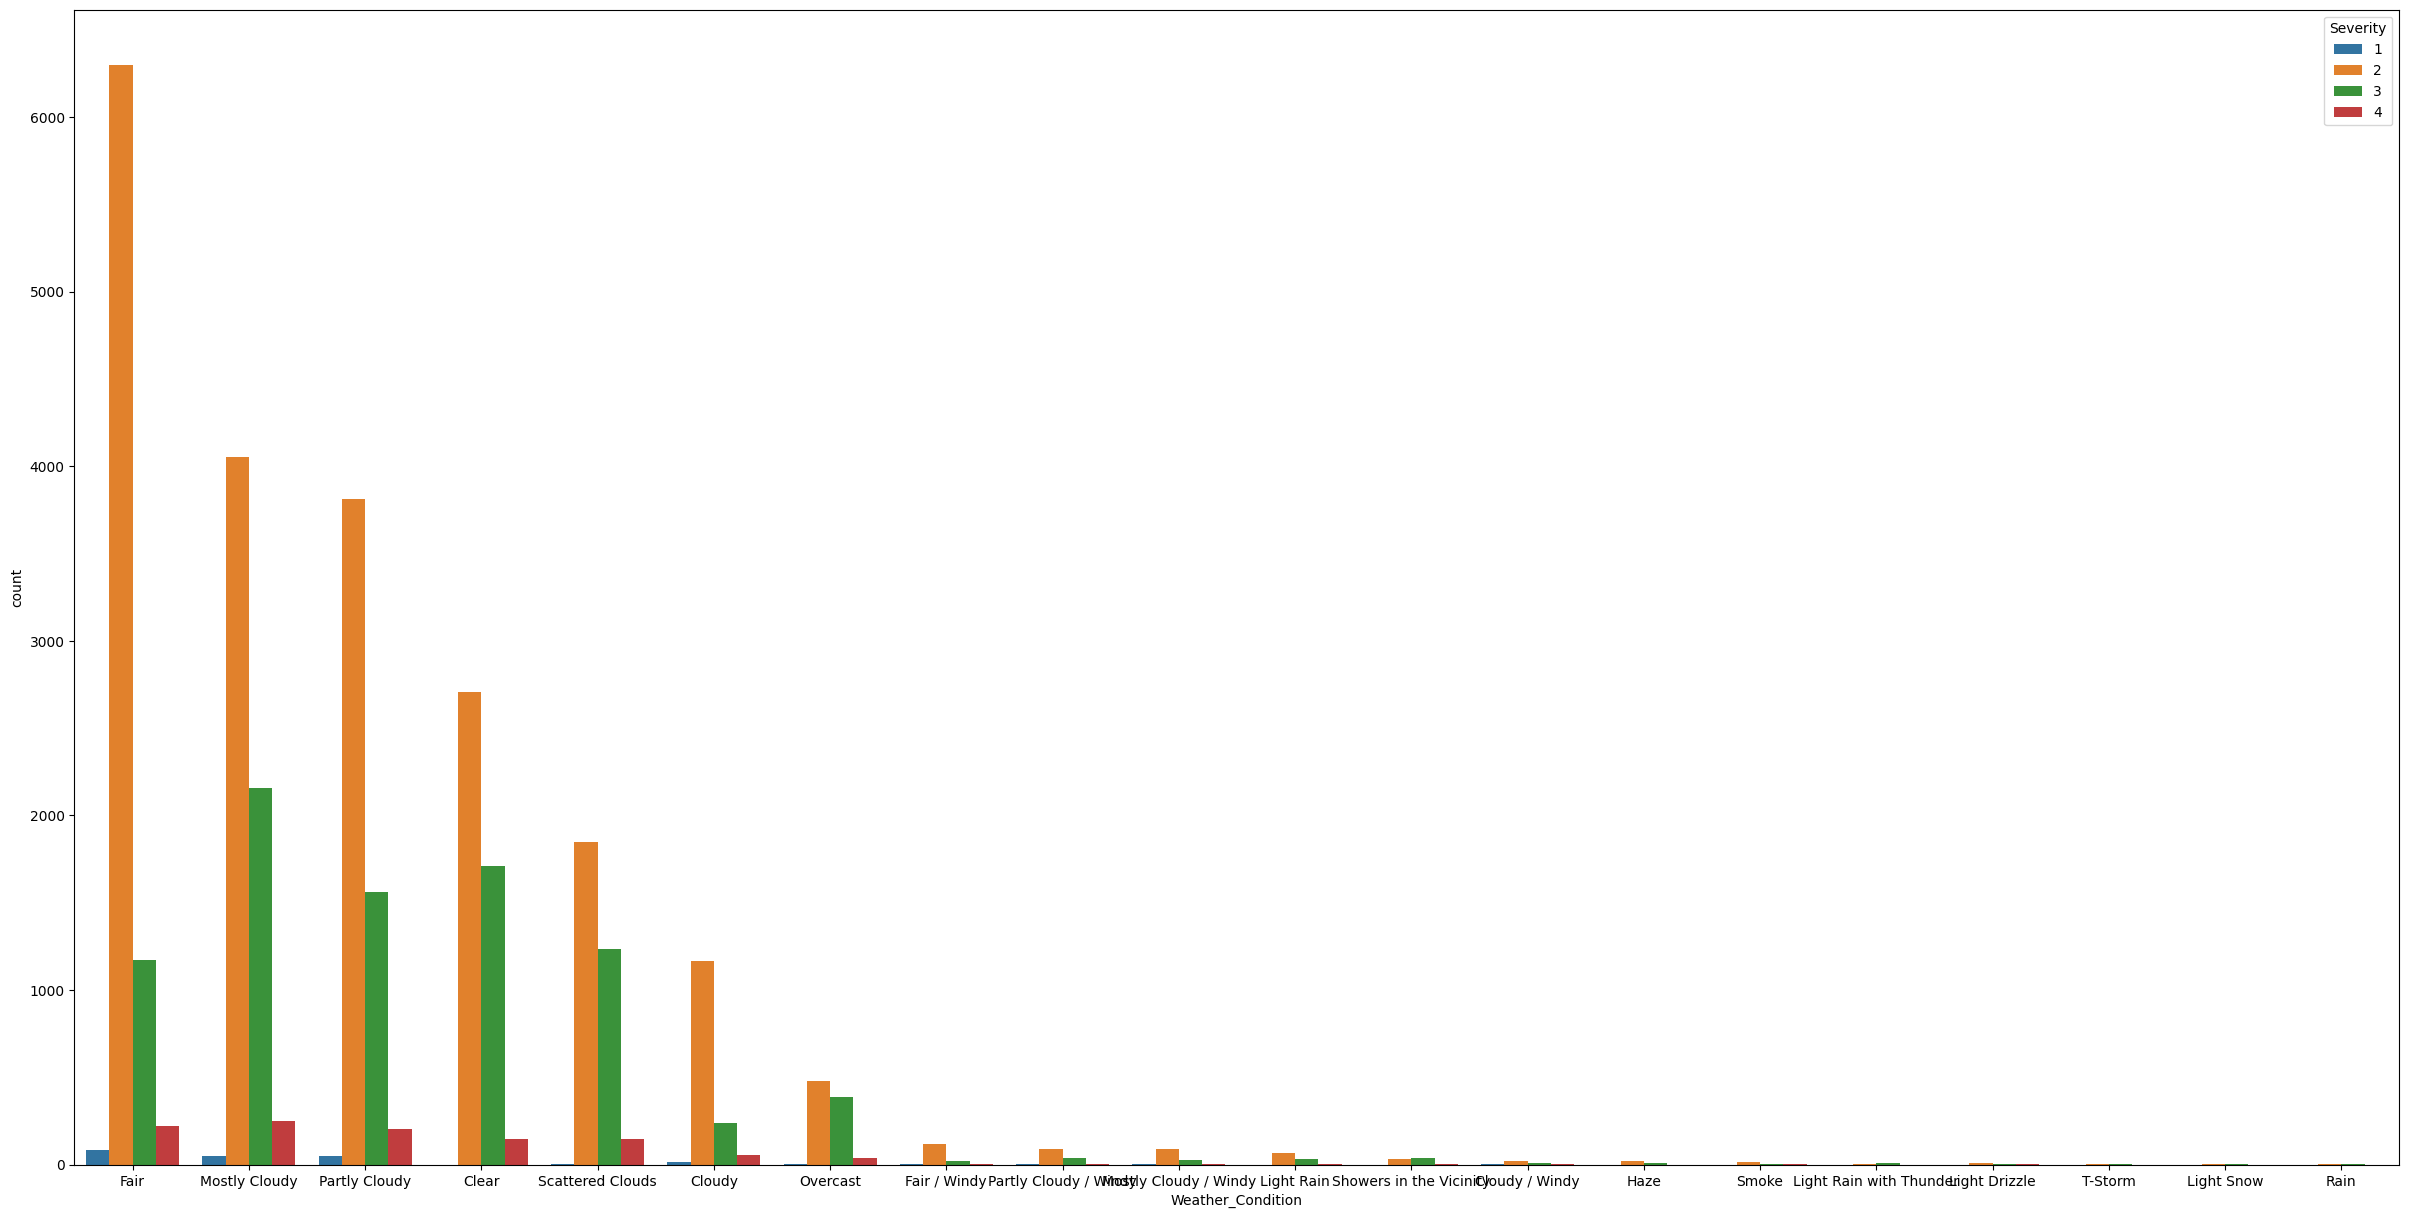

In [69]:
plt.figure(figsize=(30, 15))
sns.countplot(data=filtered_df, x='Weather_Condition', hue='Severity', order=top_20_conditions)

#### Insight: Here too Fair has highest accident count with most of them being of severity 2 while mostly cloudy has had the largest amount accidents of severity 3 when visibility is high

#### Grouping by Cities and getting their streets

In [70]:
cities_and_streets = analysis_df.groupby('City')['Street'].apply(list).reset_index()
cities_and_streets.columns = ['City', 'Street']

In [71]:
cities_and_streets.head(5)

City                                             Street
0   Aaronsburg  [Penns Valley Rd, E Aaron Sq, Penns Valley Rd,...
1    Abbeville  [Klugh Rd, Highway 28 S, Old Calhoun Falls Rd,...
2   Abbotsford  [WI-29 E, County Road F, WI-29 E, State Highwa...
3       Abbott  [US-77 S, US-77 N, US-77 N, Ih 35 N Frontage R...
4  Abbottstown  [Brough Rd, Moulstown Rd, Maple Grove Rd, York...

In [72]:
cities_and_streets.shape

(13678, 2)

In [73]:
def get_street_counts(df, city):
    # Filter the DataFrame for the specified city
    city_data = df[df['City'] == city]
    
    # Flatten the list of streets
    flattened_streets = [street for sublist in city_data['Street'] for street in sublist]
    
    # Count the occurrences of each street
    street_counts = pd.Series(flattened_streets).value_counts().nlargest(20).reset_index()
    street_counts.columns = ['Street', 'Count']
    
    return street_counts

#### The following code can output 13678 graphs with respect to each city but this has a possibility of failure and due to time constraints we will stick to analysing top 20 cities and their top 20 streets

In [74]:
selected_cities = [
    'Miami', 'Houston', 'Los Angeles', 'Charlotte', 'Dallas', 'Orlando', 'Austin', 
    'Raleigh', 'Nashville', 'Baton Rouge', 'Atlanta', 'Sacramento', 'San Diego', 
    'Phoenix', 'Minneapolis', 'Richmond', 'Oklahoma City', 'Jacksonville', 'Tucson', 
    'Columbia'
]

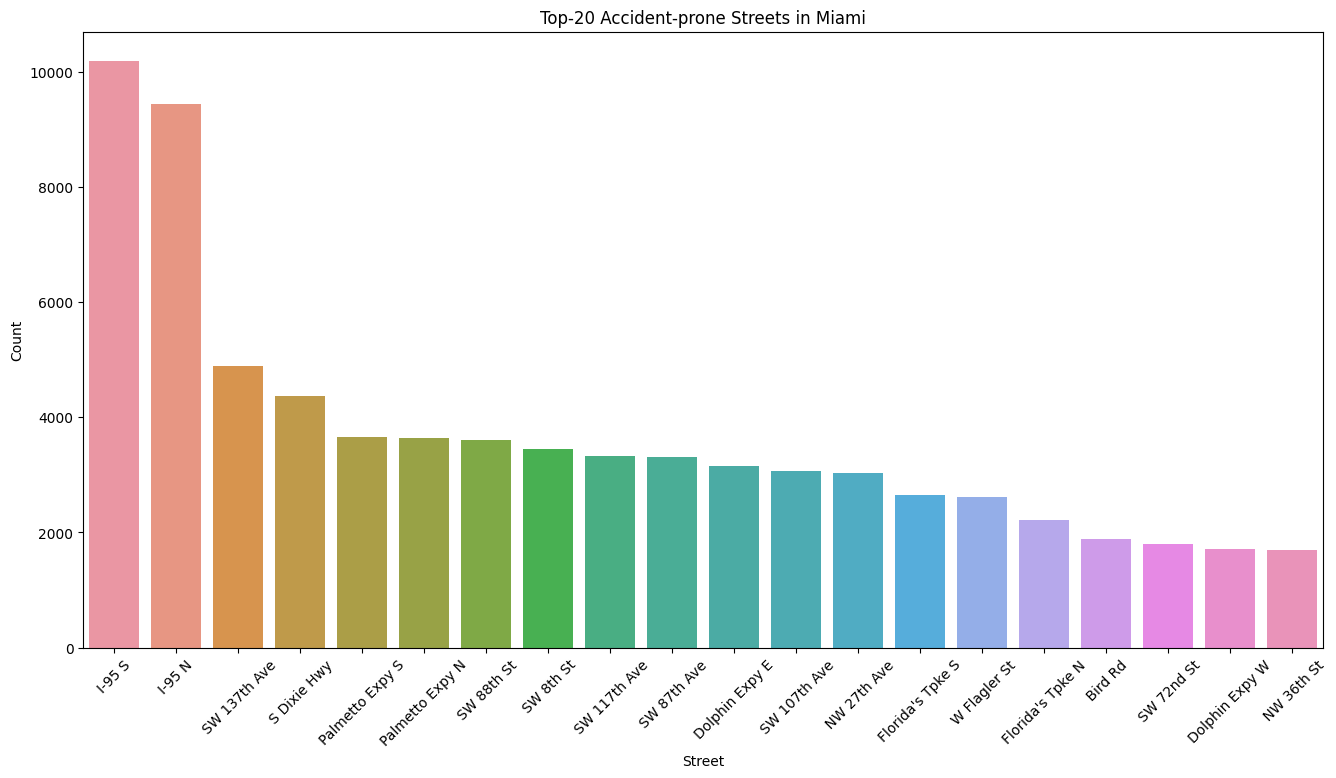

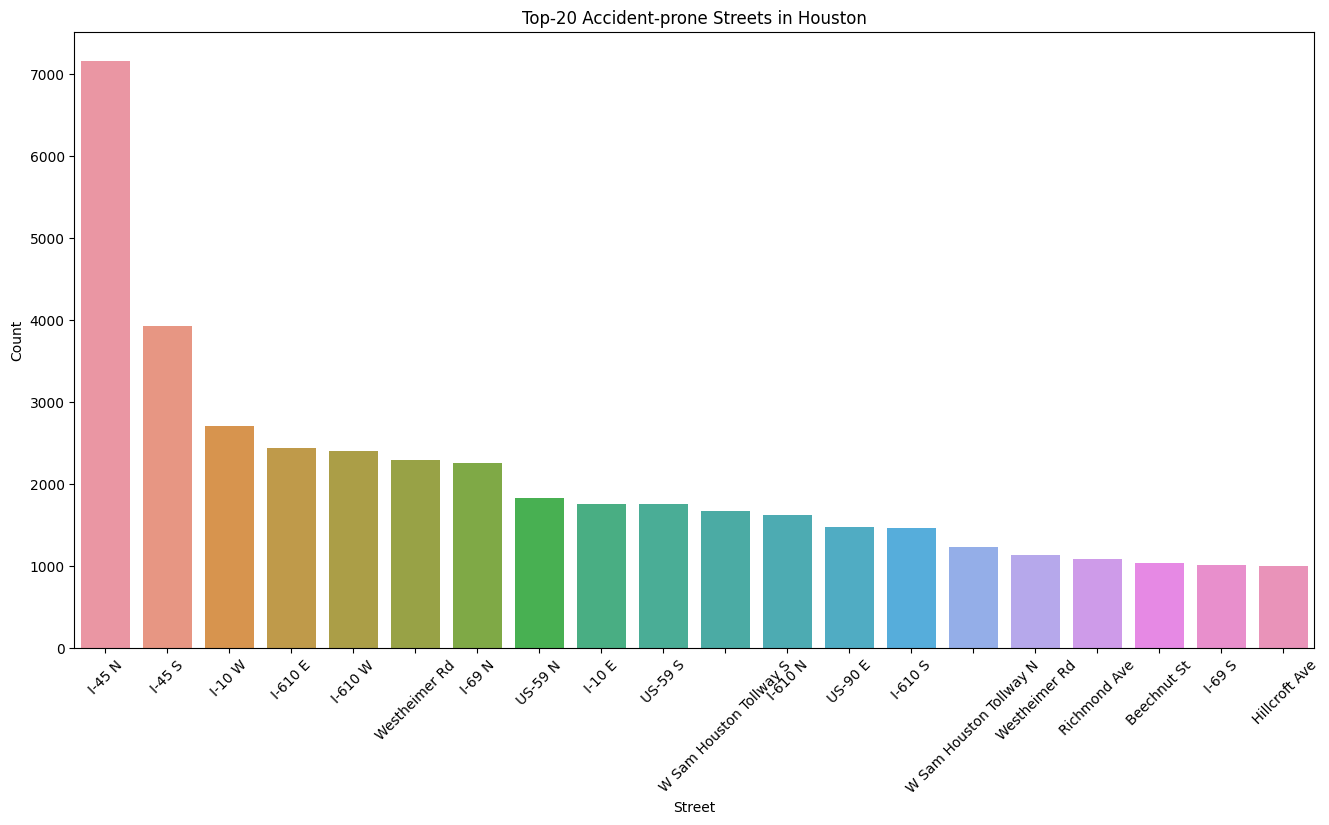

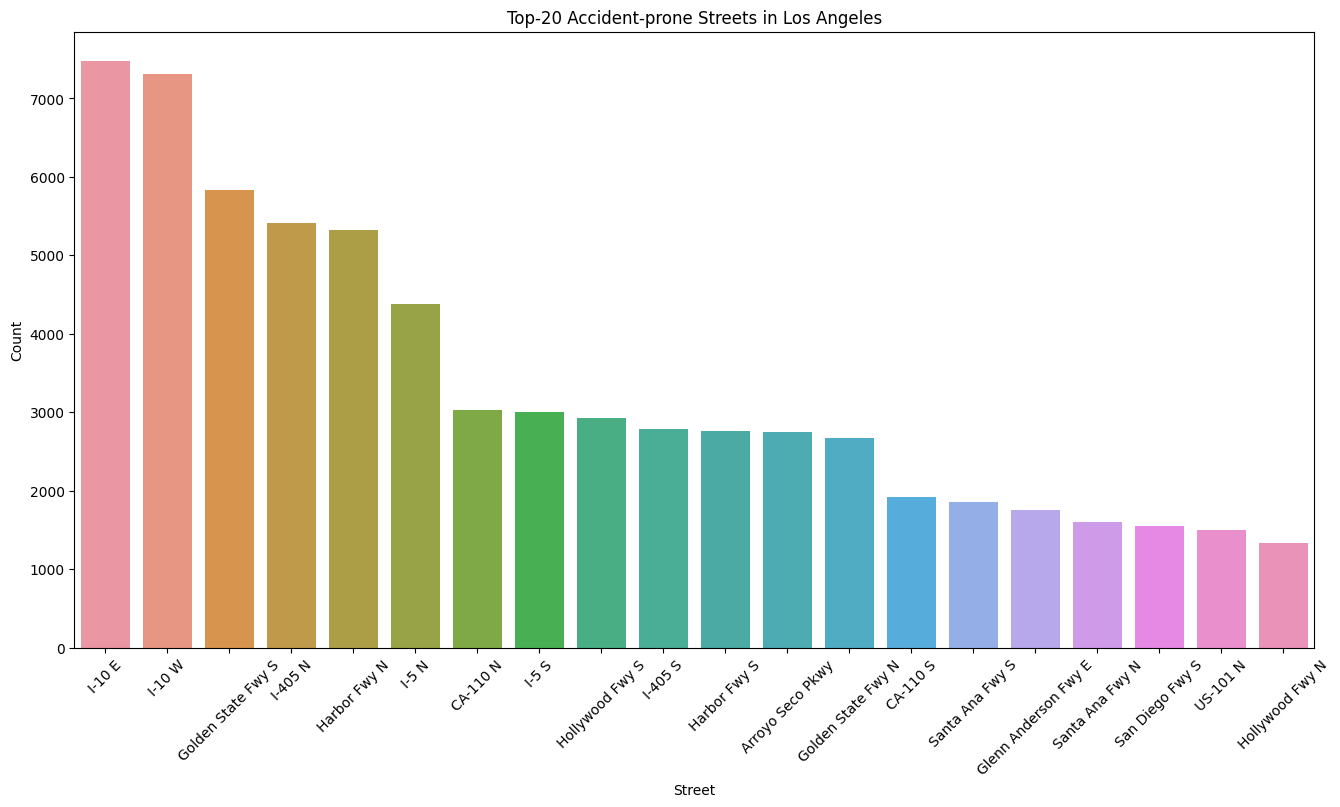

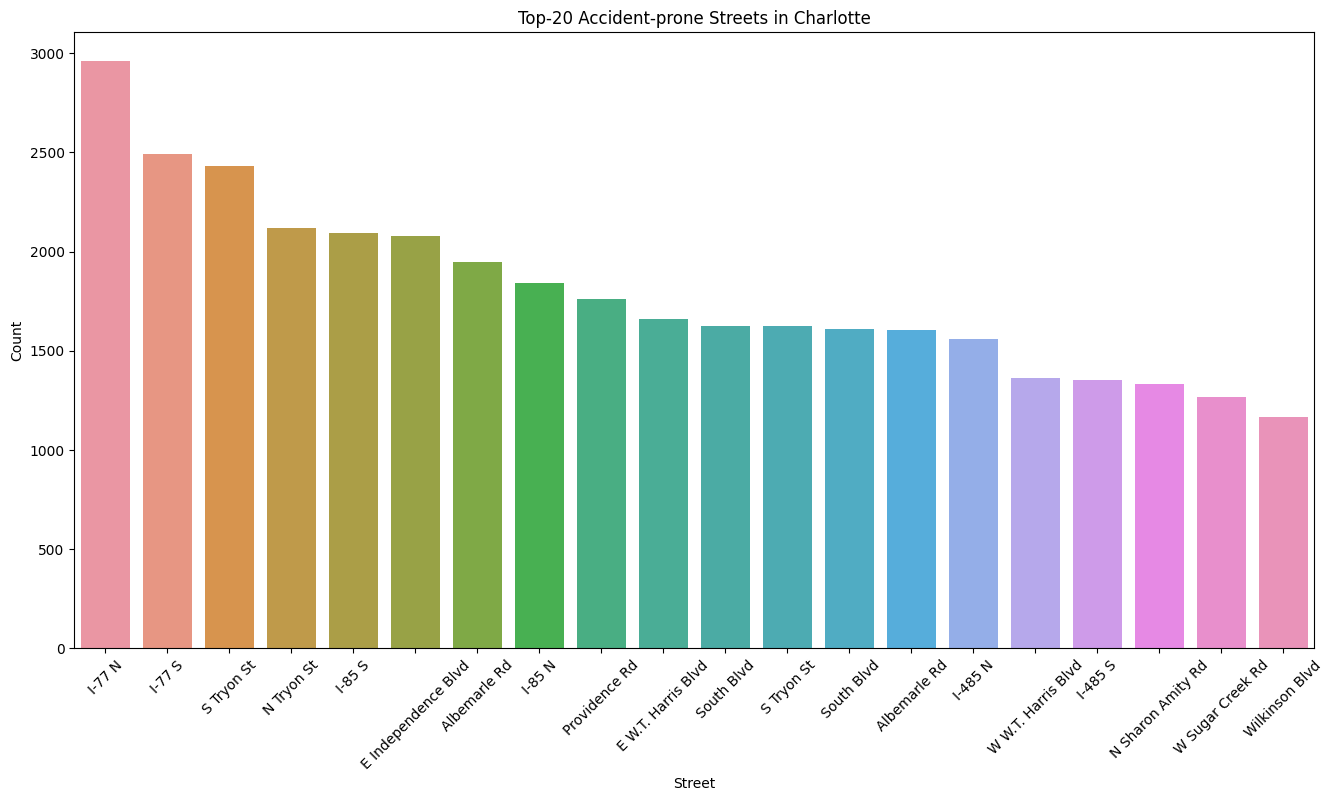

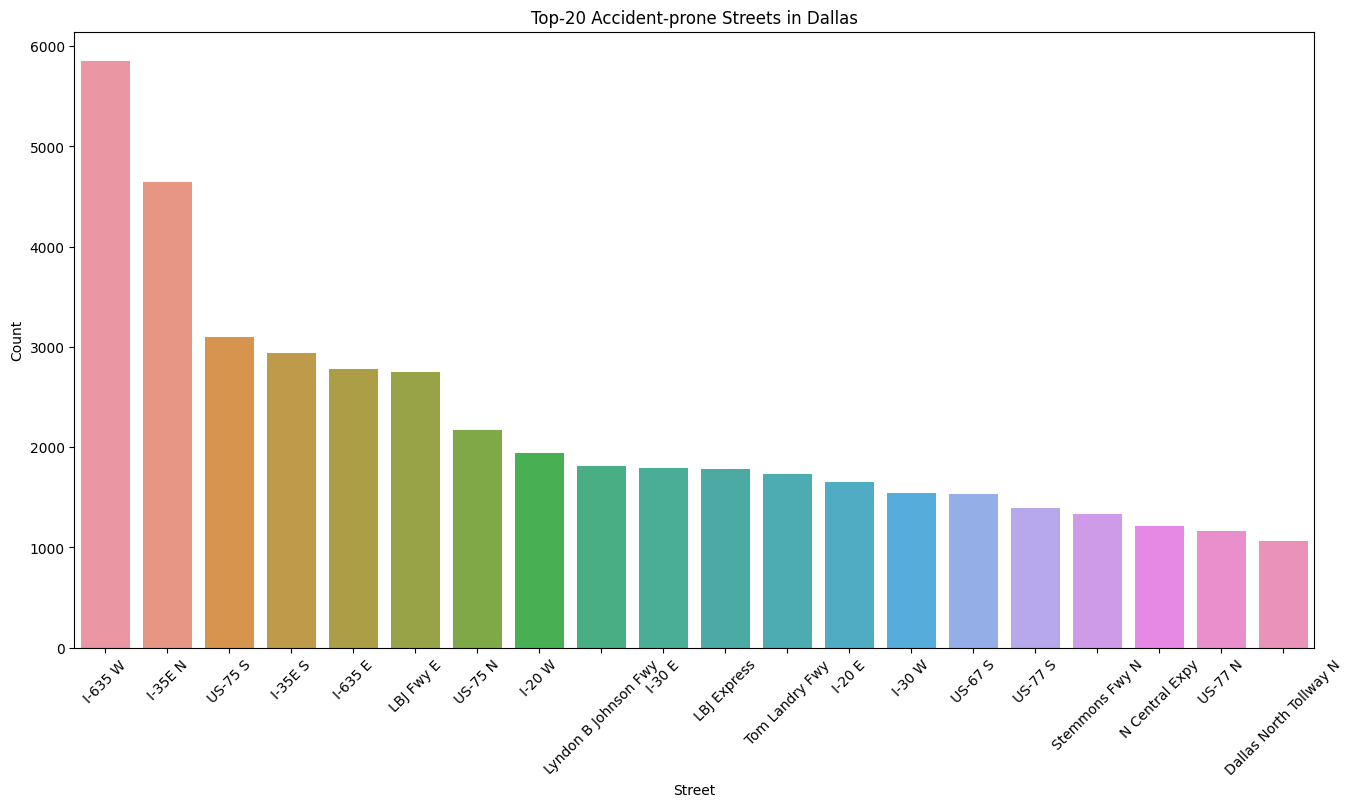

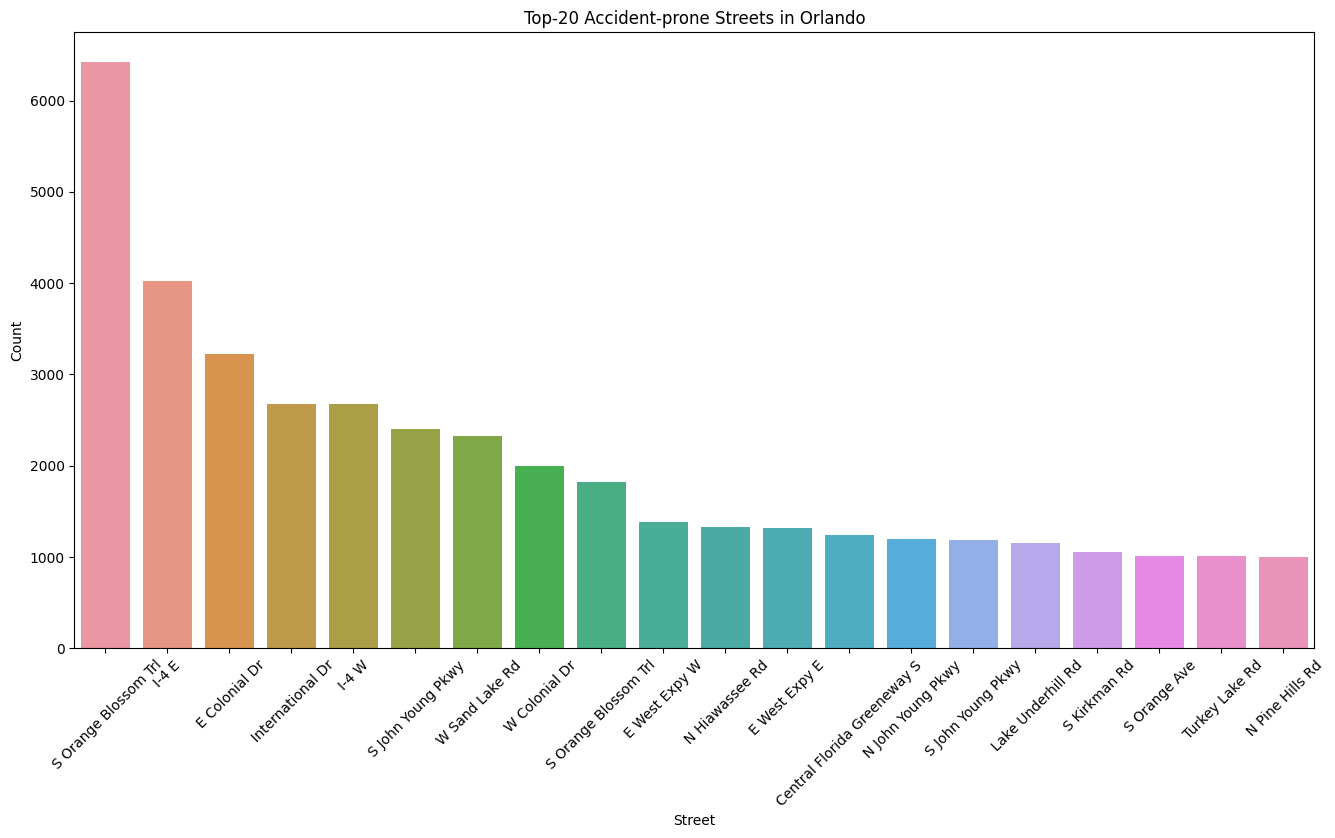

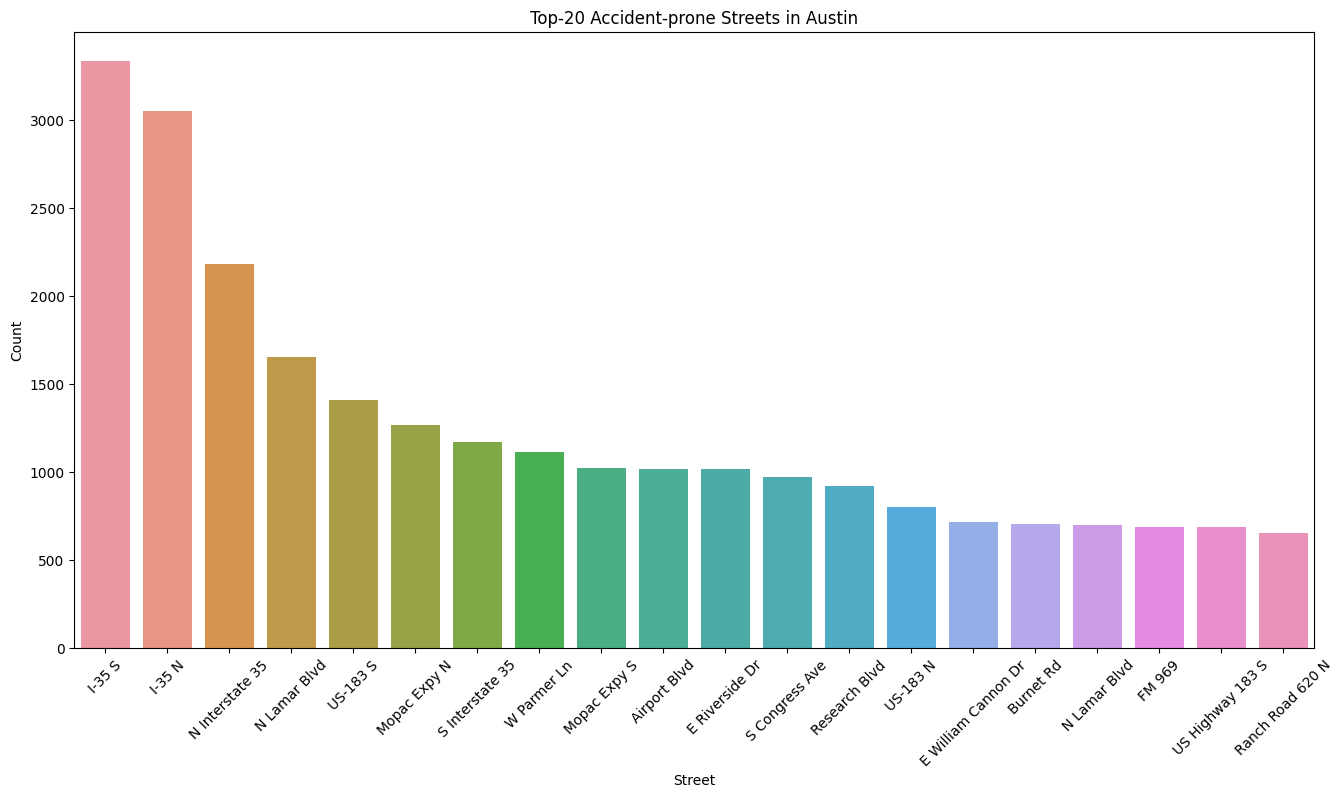

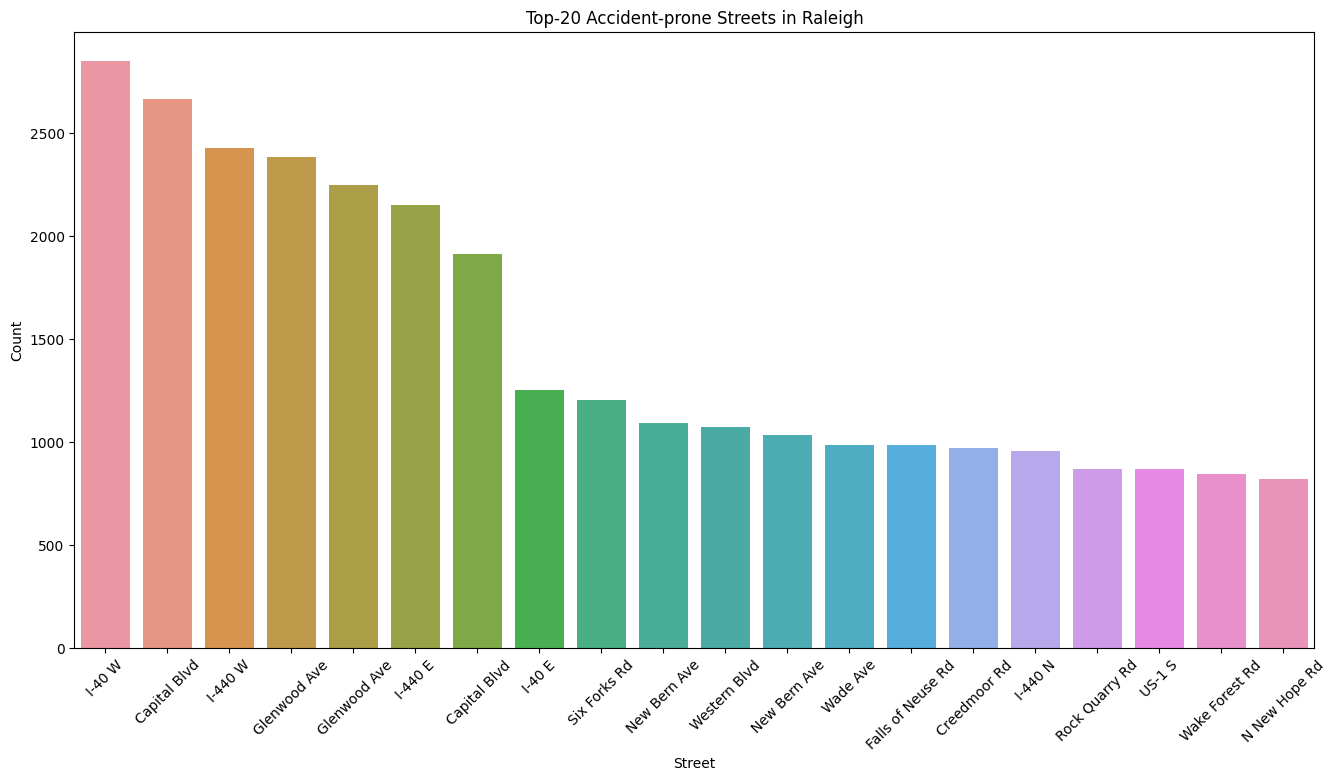

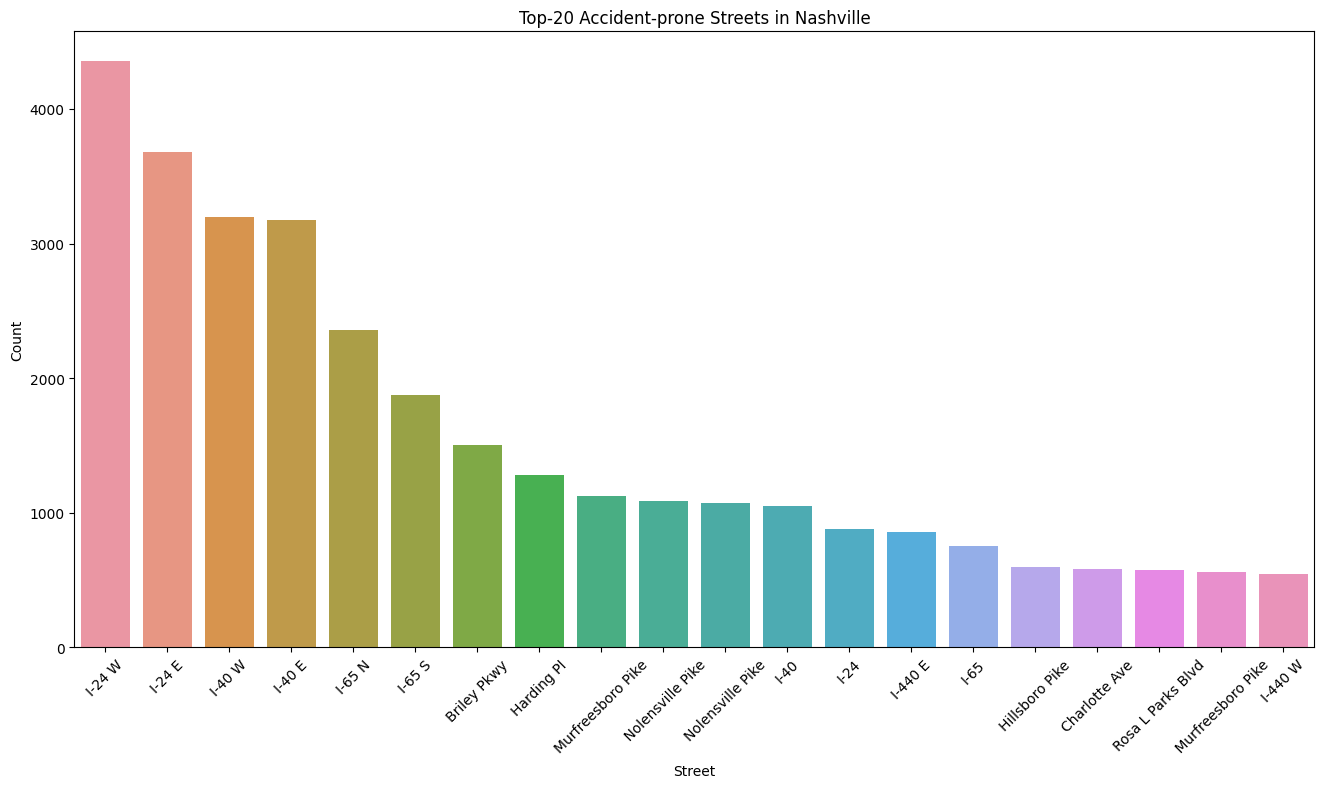

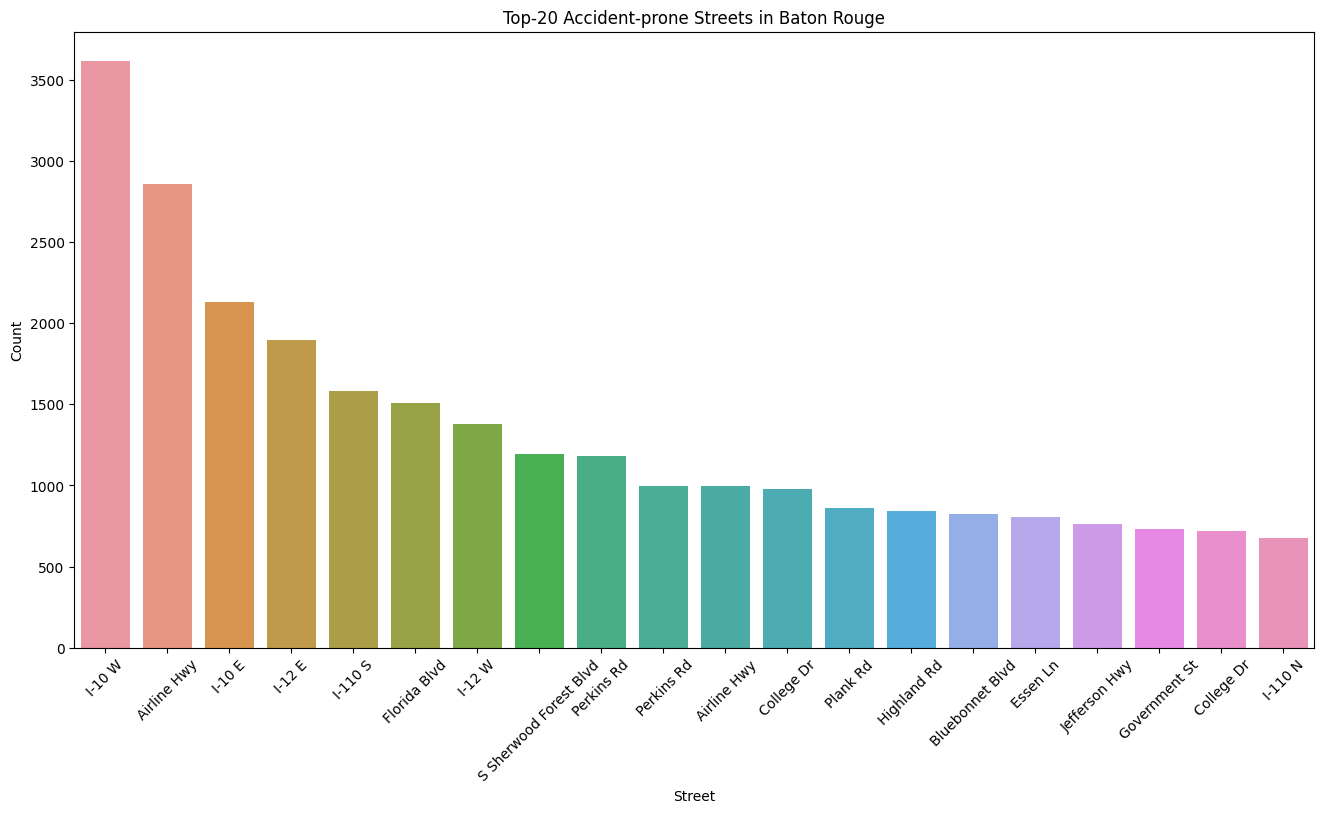

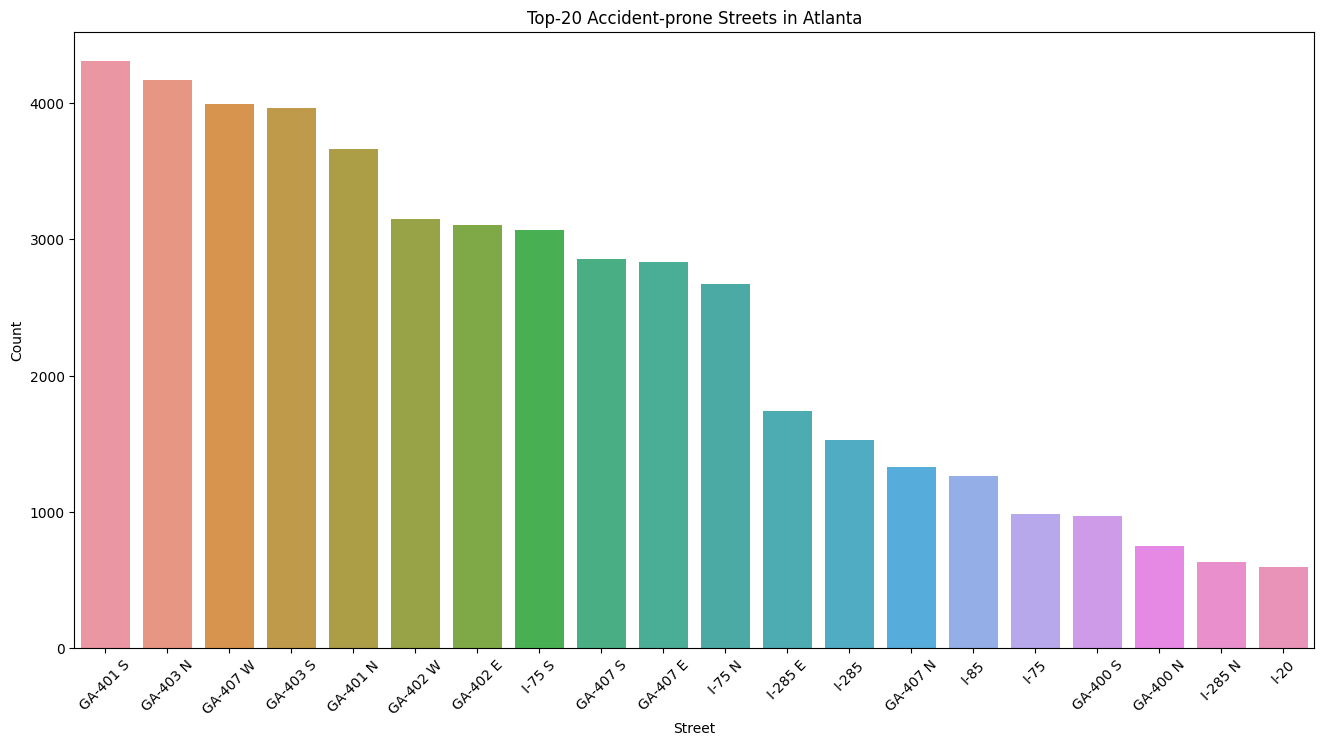

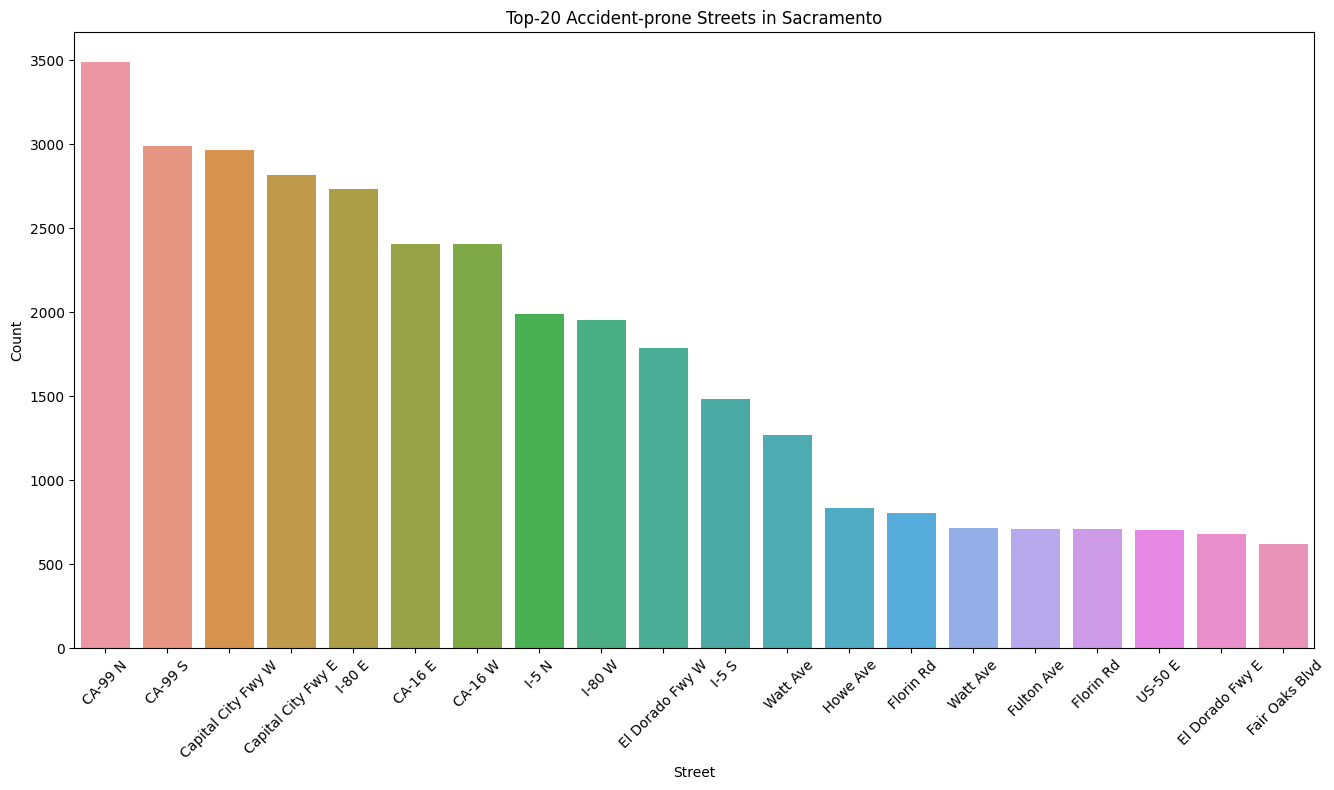

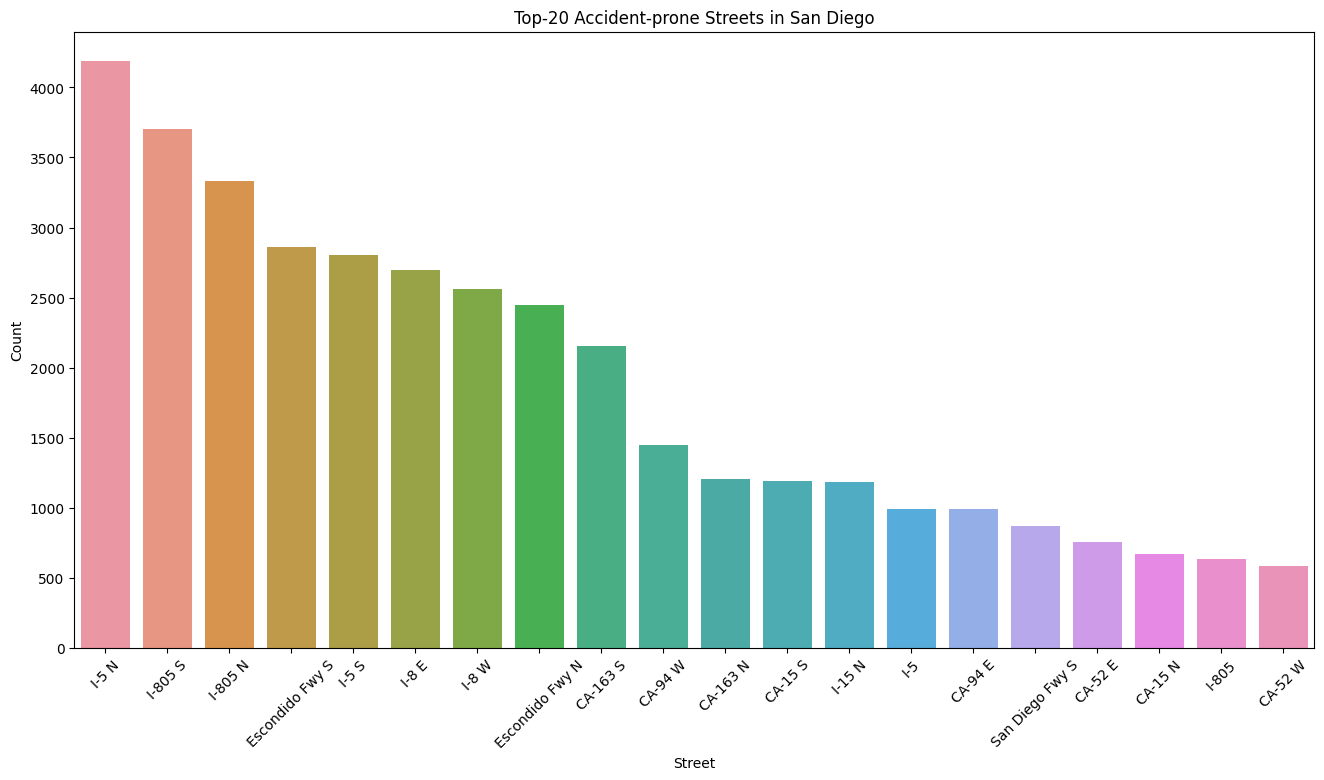

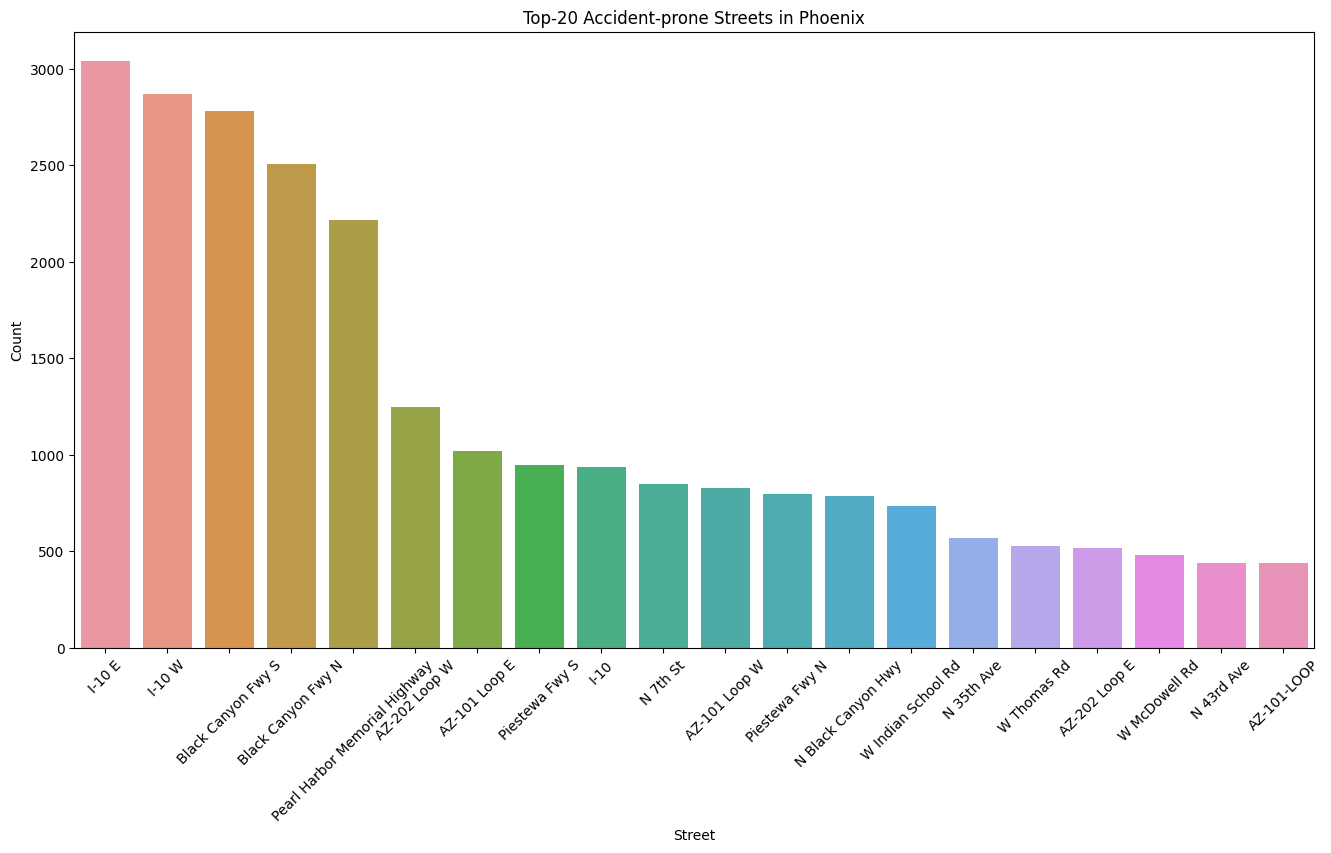

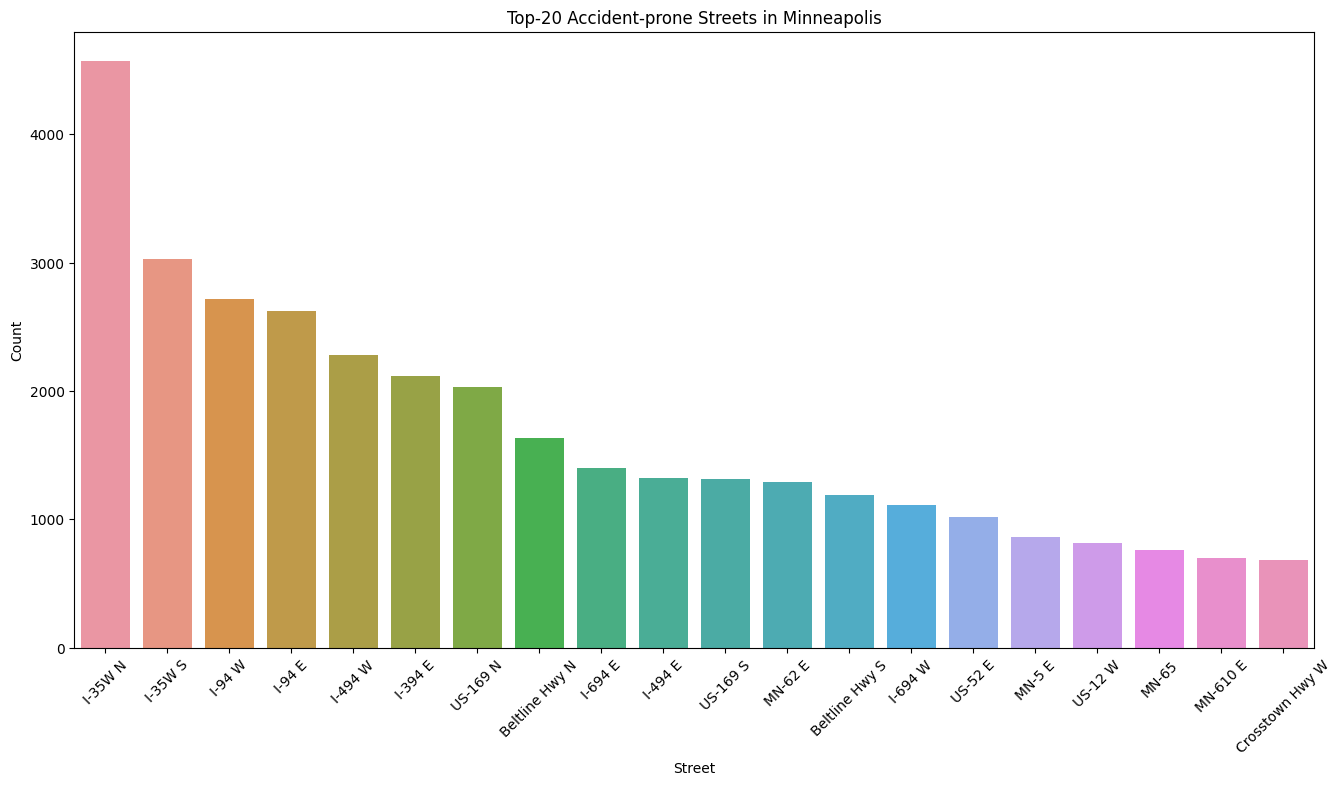

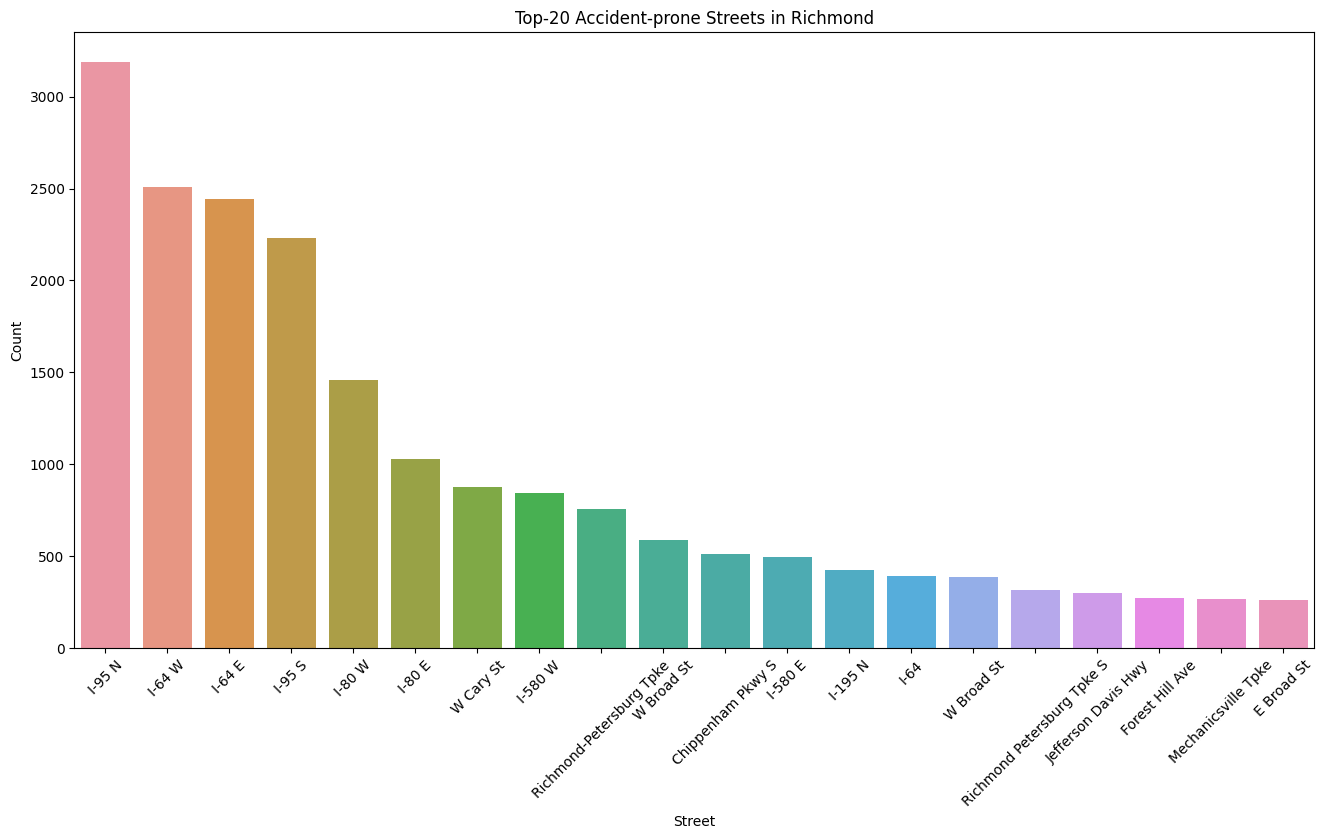

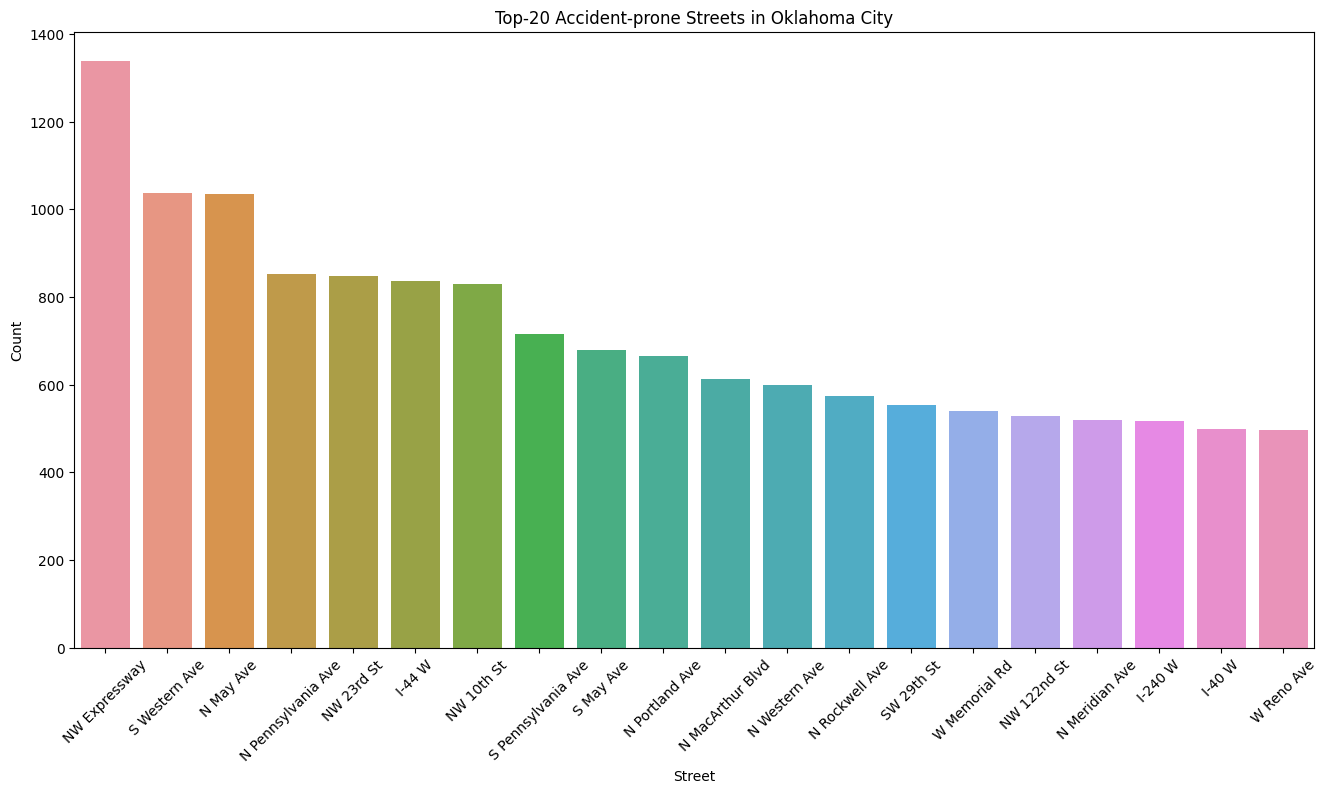

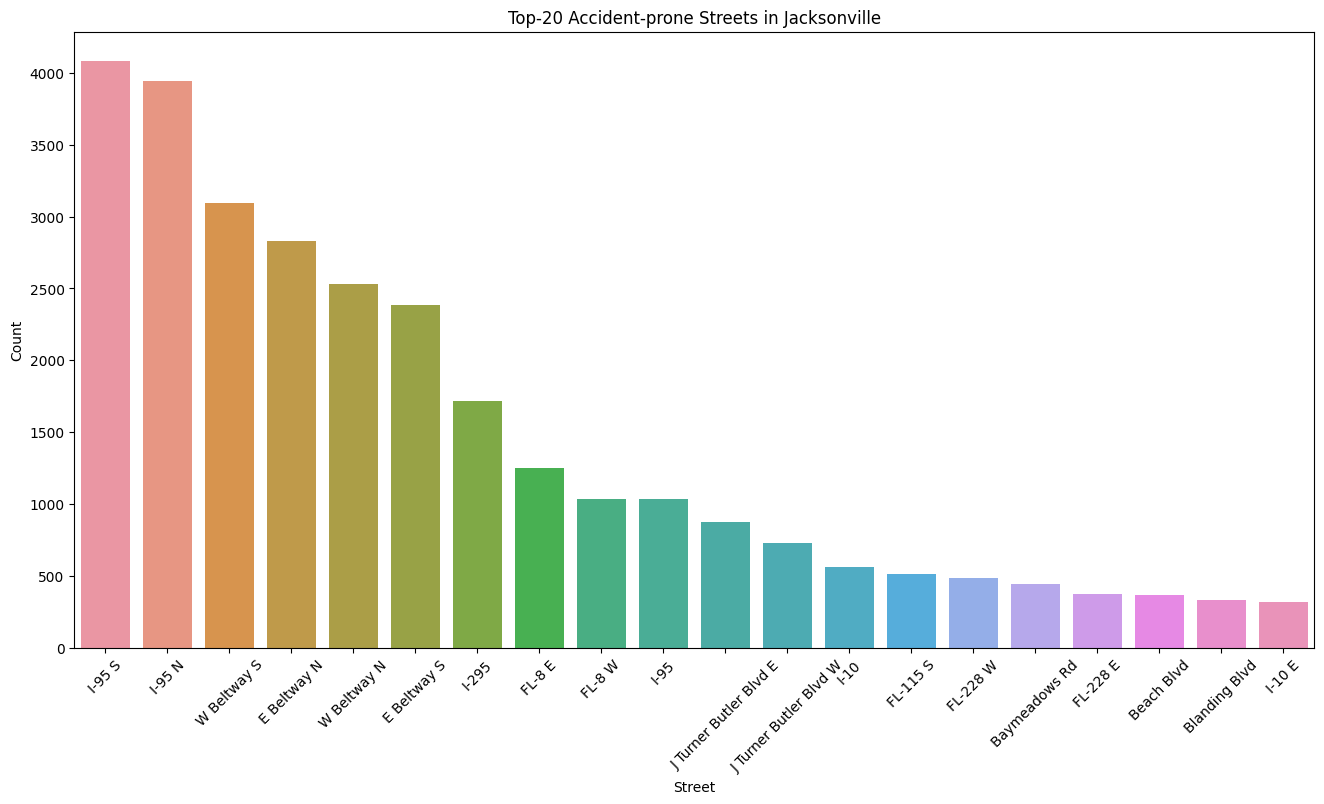

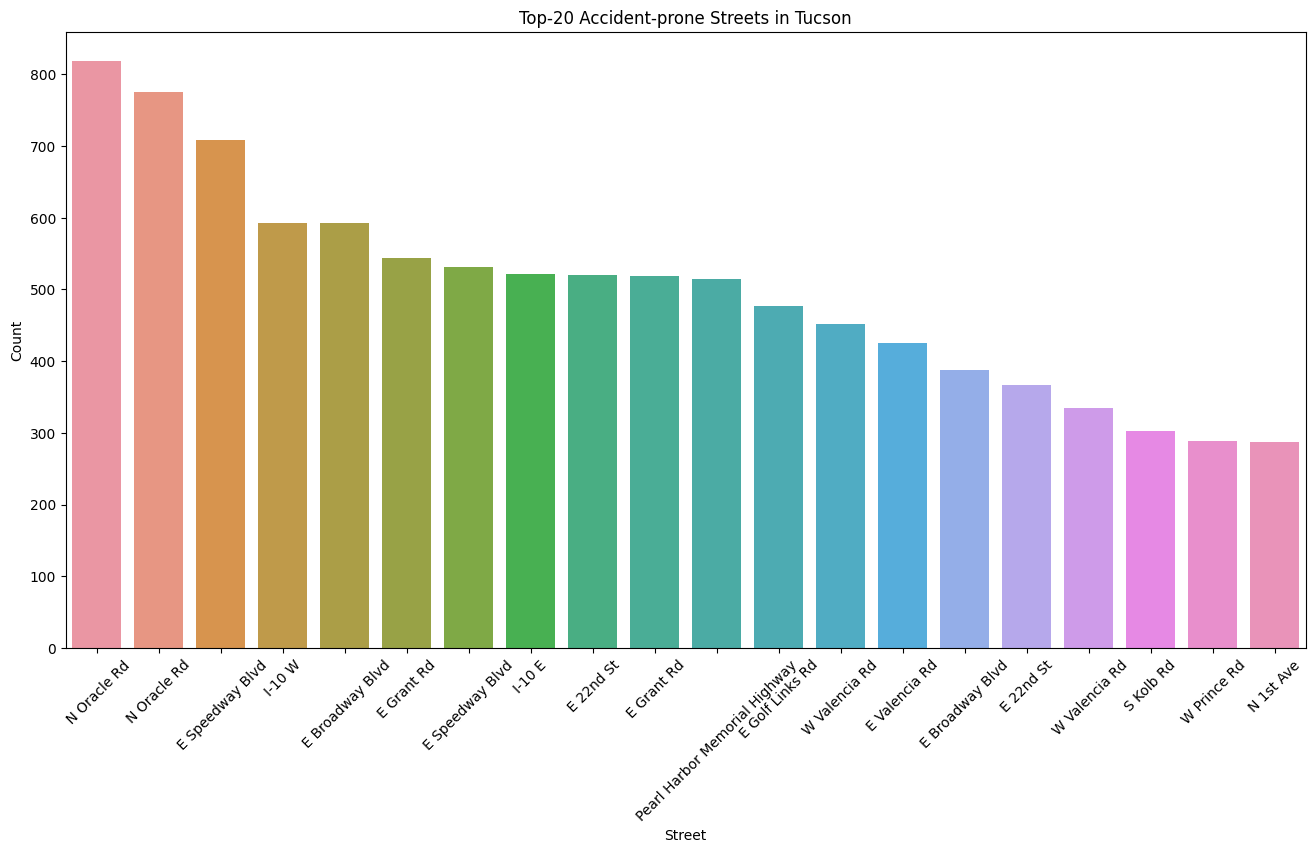

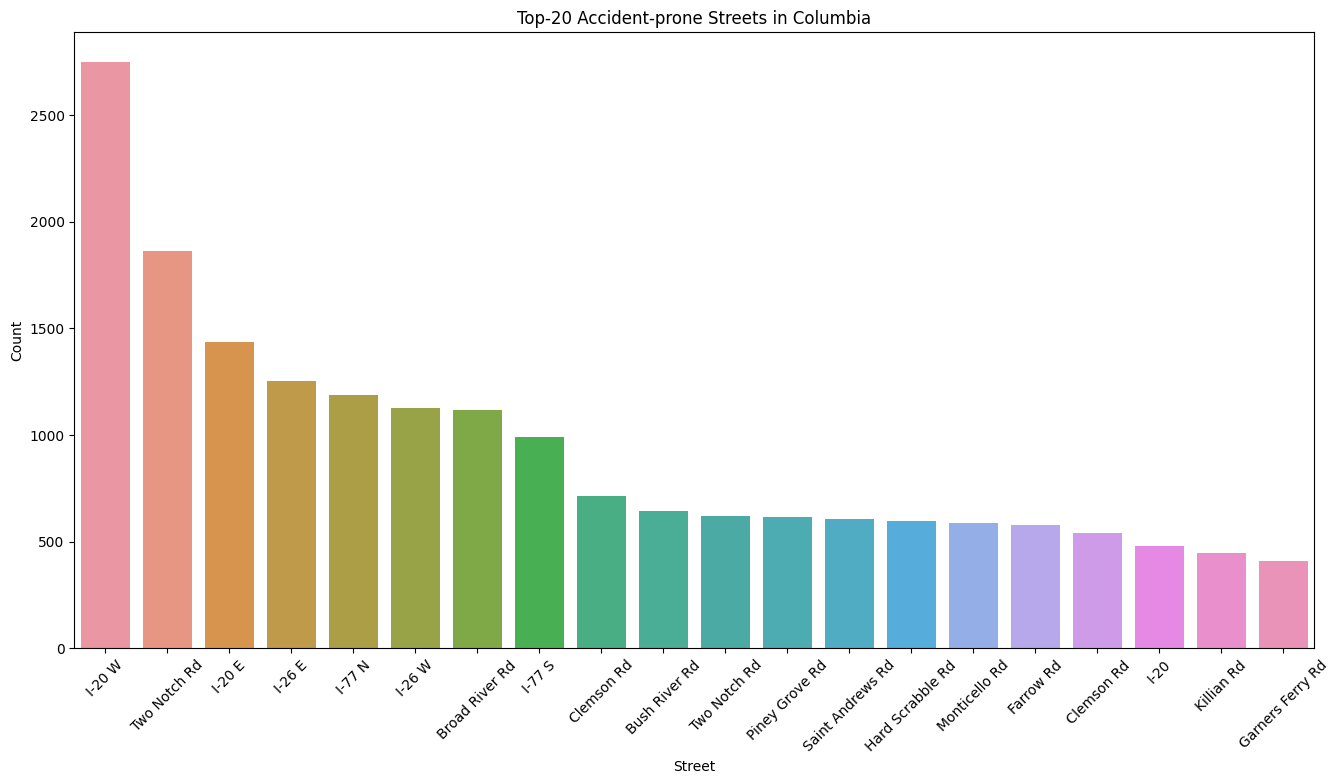

In [75]:
for city in selected_cities:
    street_counts = get_street_counts(cities_and_streets, city)
    
    plt.figure(figsize=(16, 8))
    sns.barplot(data=street_counts, x='Street', y='Count')
    plt.xlabel('Street')
    plt.ylabel('Count')
    plt.title(f'Top-20 Accident-prone Streets in {city}')
    plt.xticks(rotation=45)
    plt.show()

### Insights for the Top-3 streets with most accidents in each of Top-20 accident-prone cities:
#### - Miami -> I-95 S (>10000) , I-95 N (>9000), SW 137th Ave (5000)
#### - Houston -> I-45 N (>7000) , I-45 S (4000), I-10 W (>2600)
#### - Los Angeles -> I-10 E (>7000) , I-10 W (>7000), Golden State Fwy S (6000)
#### - Charlotte -> I-77 N (3000) , I-77 S (2500), S Tryon St (2400)
#### - Dallas -> I-635 W (5800) , I-35E N (>6600), US-75 S (3100)
#### - Orlando -> S Orange Blossom Trl (6500) , I-4 E (4000), E Colonial Dr (3200)
#### - Austin -> I-35 S (>3500) , I-35 N (>3000), N InterState 35 (>2200)
#### - Raleigh -> I-40 W (>2500) , Capital Blvd (>2500), I-440 W (2400)
#### - Nashville -> I-24 W (>4000) , I-24 E (>3600), I-40 W (3200)
#### - Baton Rouge -> I-10 W (>3500) , Airpline Hwy (>2800), I-10 E (2100)
#### - Atlanta -> GA-401 S (>4000) , GA-403 N (>4000), GA-407 W (4000)
#### - Sacramento -> CA-99 N (3500) , CA-99 S (3000), Capital City Fwy W (3000)
#### - San Diego -> I-5 N (>4000) , I-805 S (>3600), I-805 N (>3400)
#### - Phoenix -> I-10 E (>3000) , I-10 W (>2800), Black Canyon Fwy S (2800)
#### - Minneapolis -> I-35W N (>4500) , I-35W S (~3000), I-94 W (2800)
#### - Richmond -> I-95 N (>3000) , I-64 W (2500), I-64 E (2400)
#### - Oklahoma City -> NW Expressway (>1300) , 5 Western Ave (>1000), N May Ave (1000)
#### - Jacksonville -> I-95 S (>4000) , I-95 N (3900), W Beltway S (3100)
#### - Tucson -> N Oracle Rd (>800) , N Oracle Rd (>760), E Speedway Blvd (710)
#### - Columbia -> I-20 W (>2800) , Two Notch Rd (>1800), I-20 E (1400)

#### Now lets answer the final question of how weather condition affects accidents in each state

In [76]:
analysis_df.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

#### 49 states in total to analyse with the Top-20 Accident having Weather_conditions

In [77]:
states = ['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD']

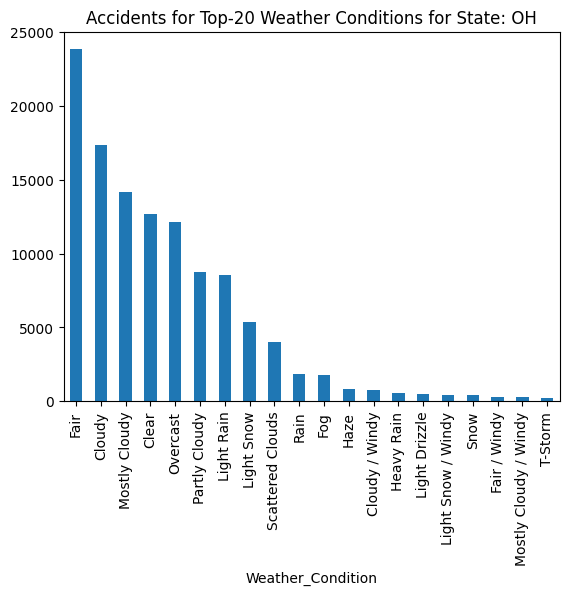

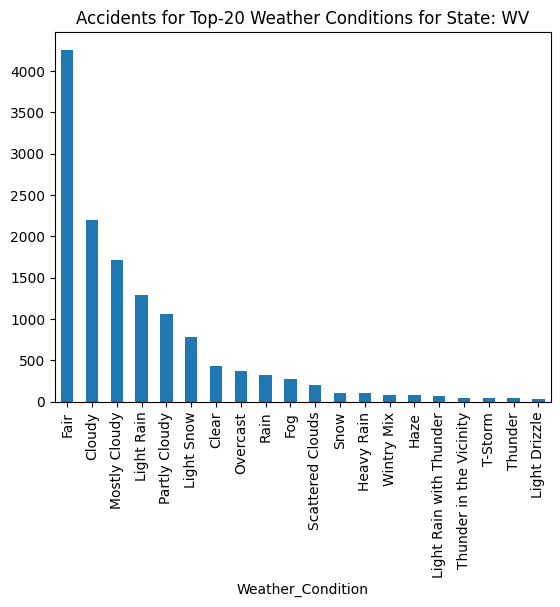

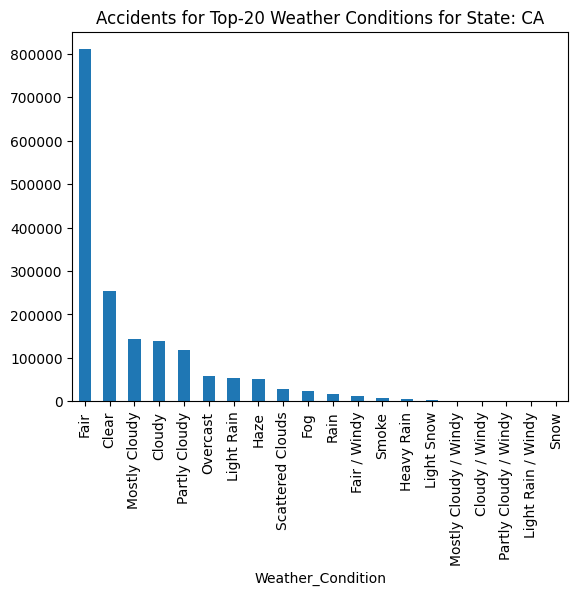

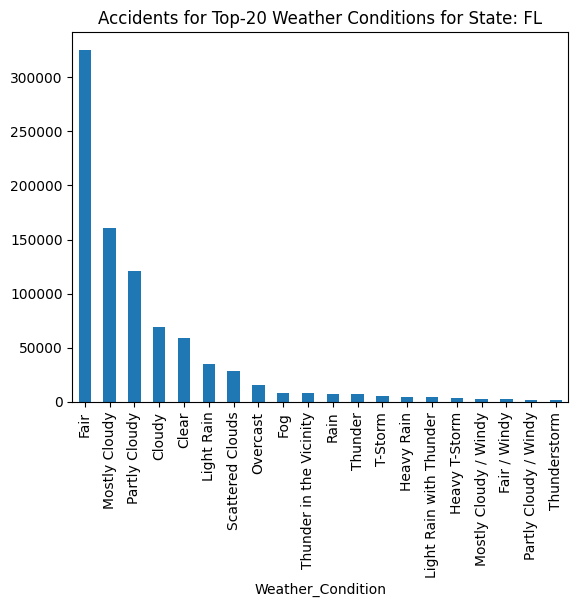

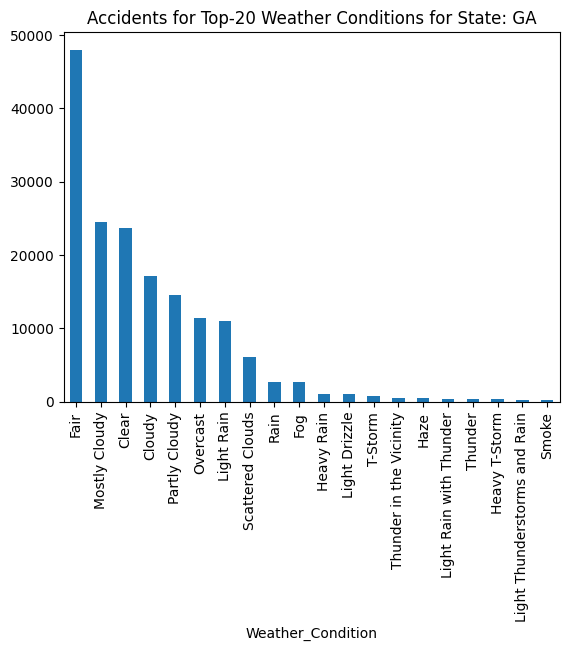

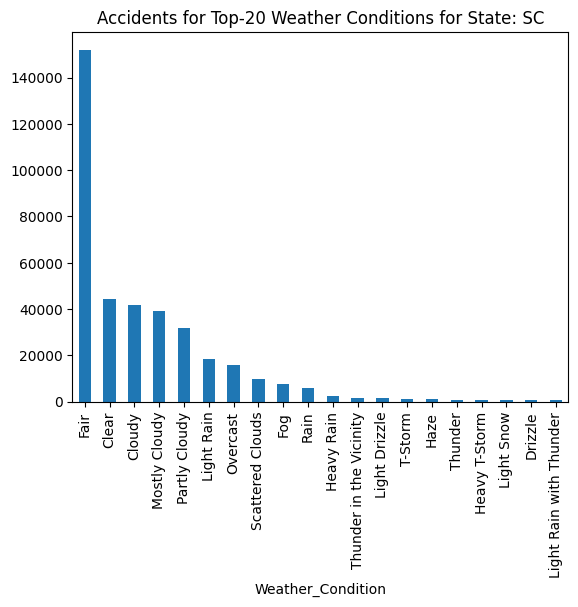

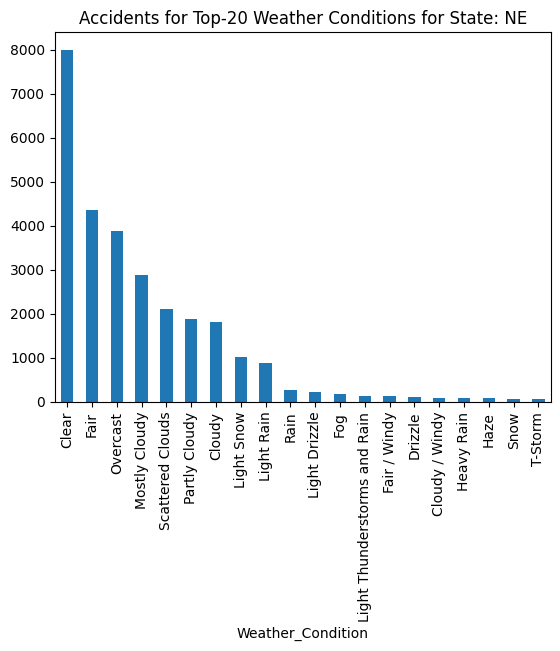

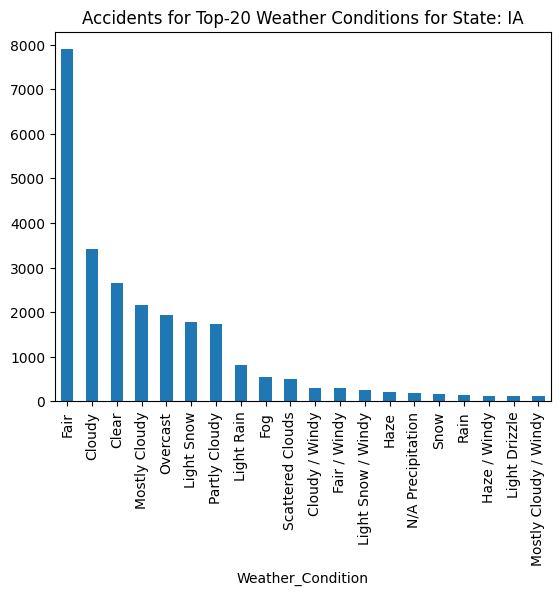

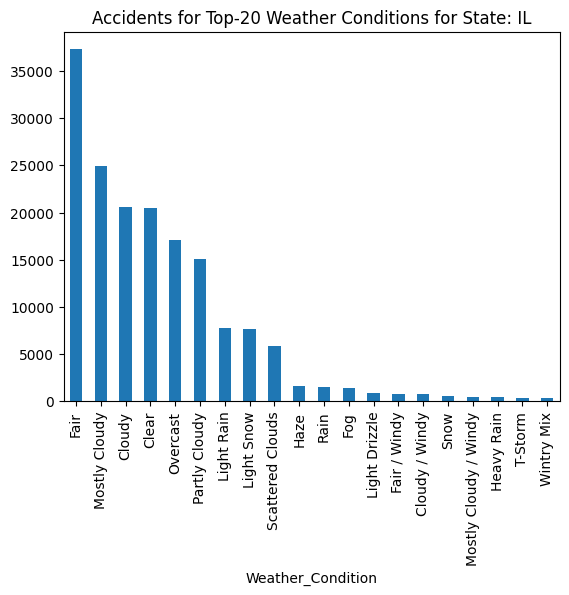

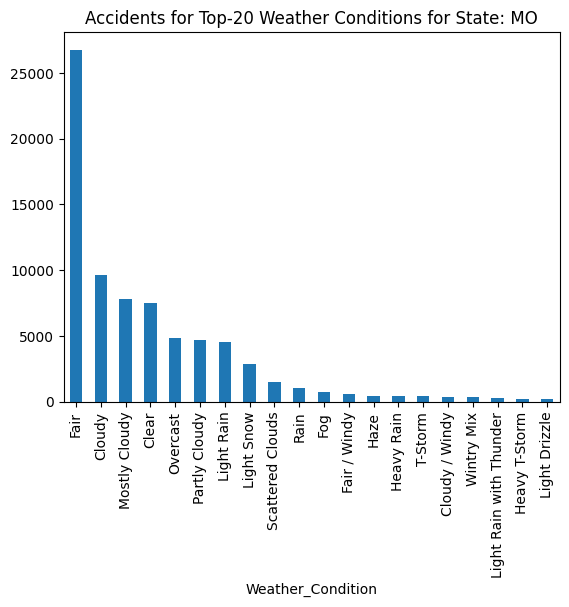

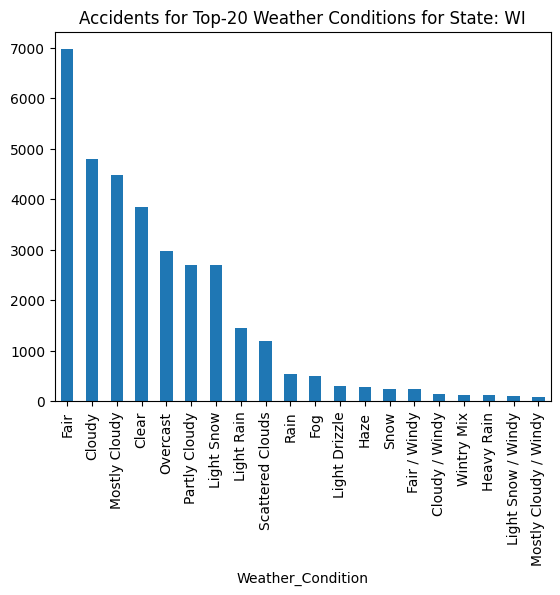

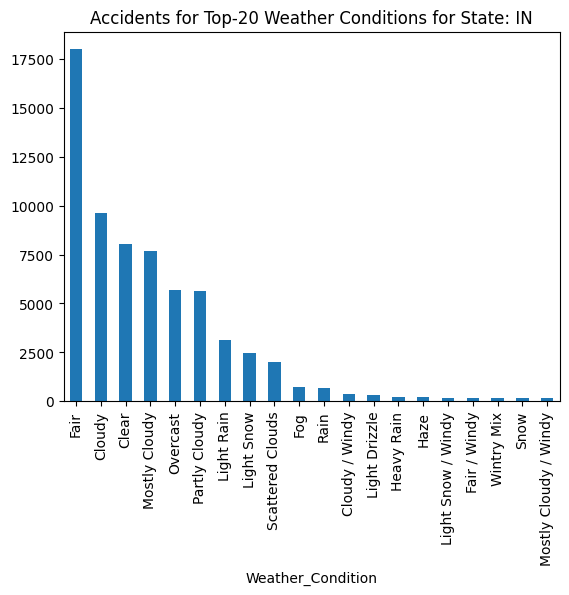

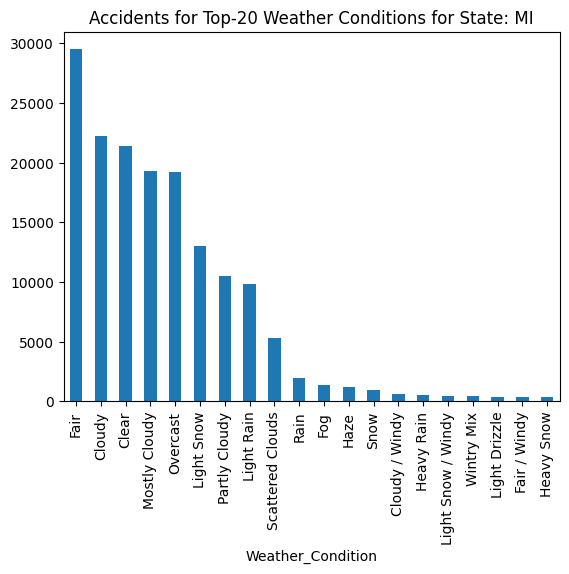

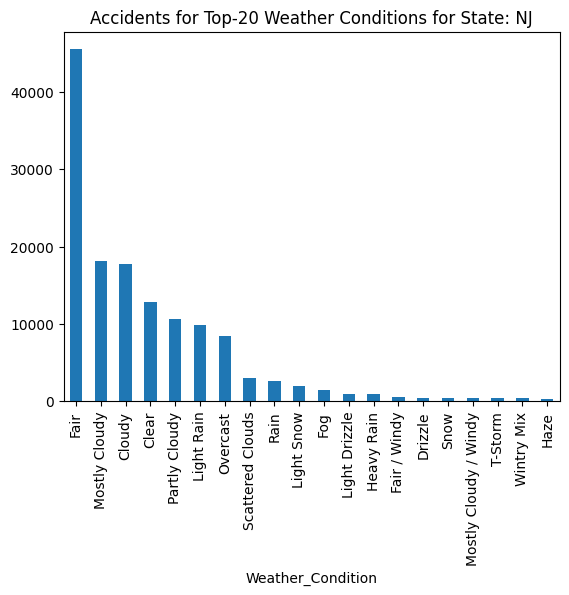

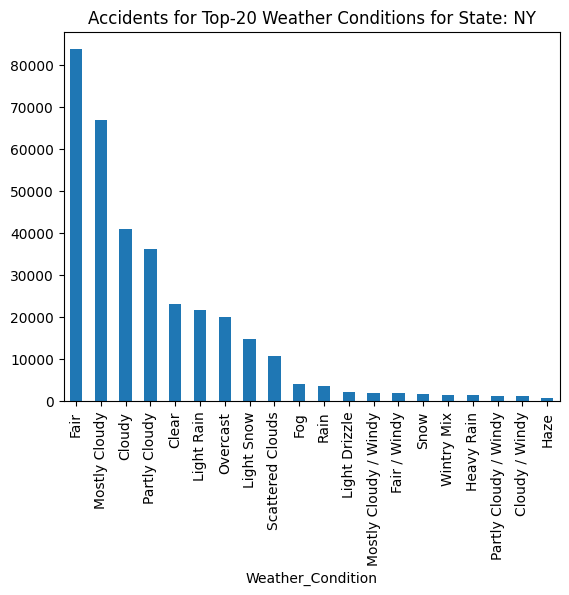

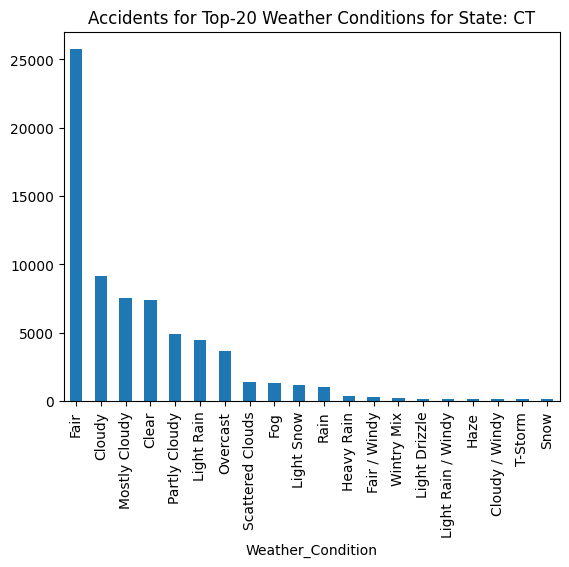

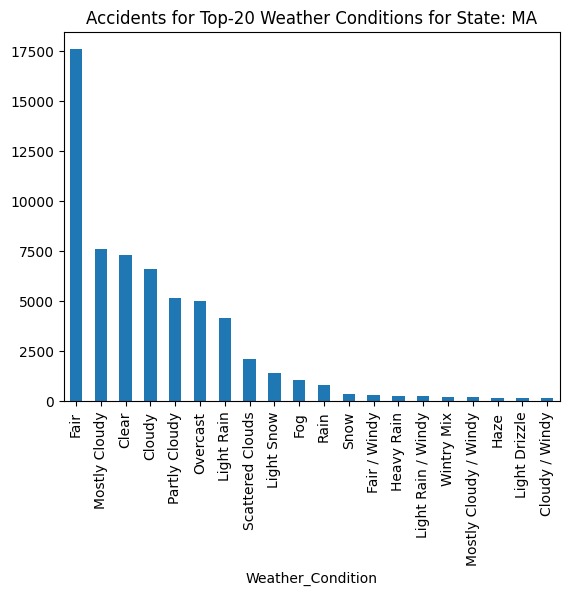

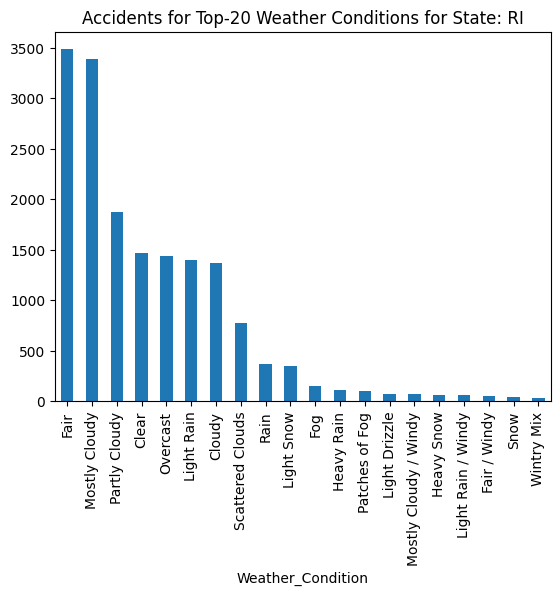

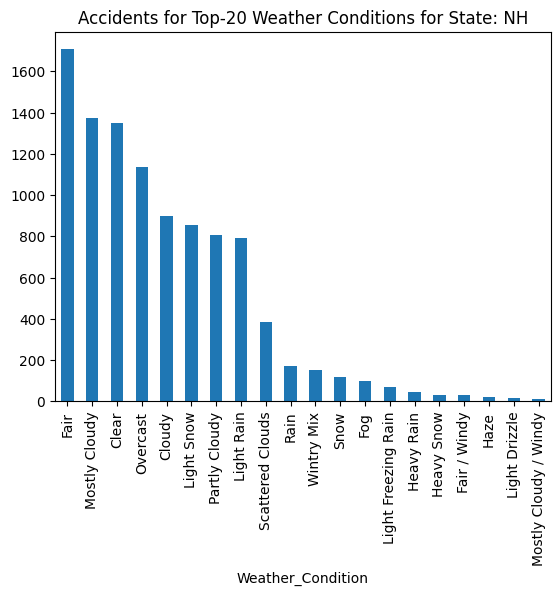

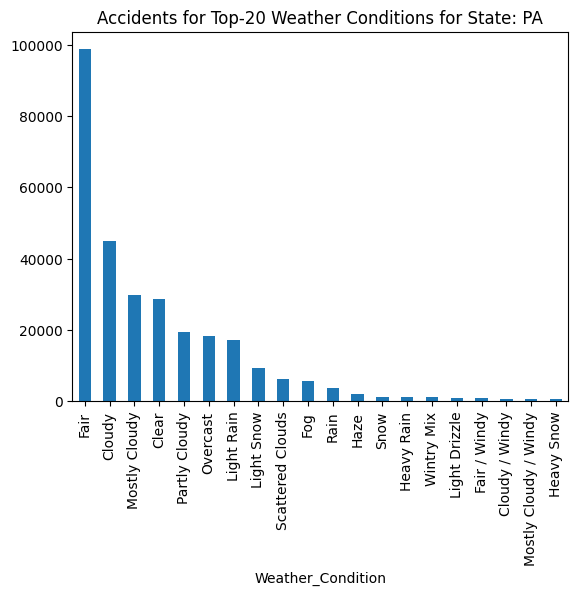

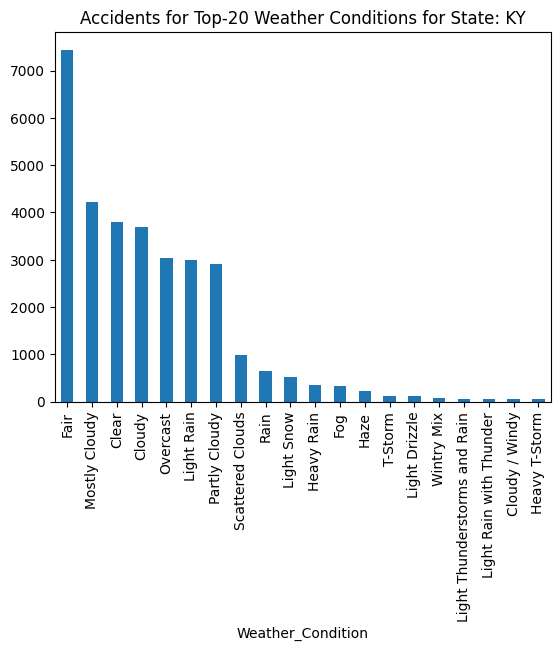

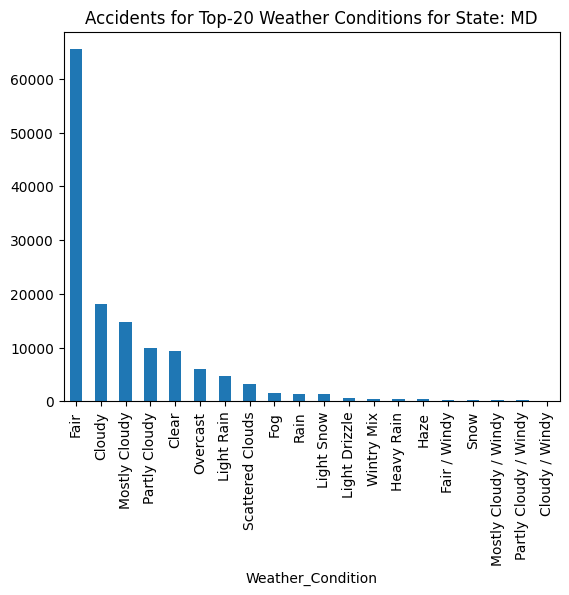

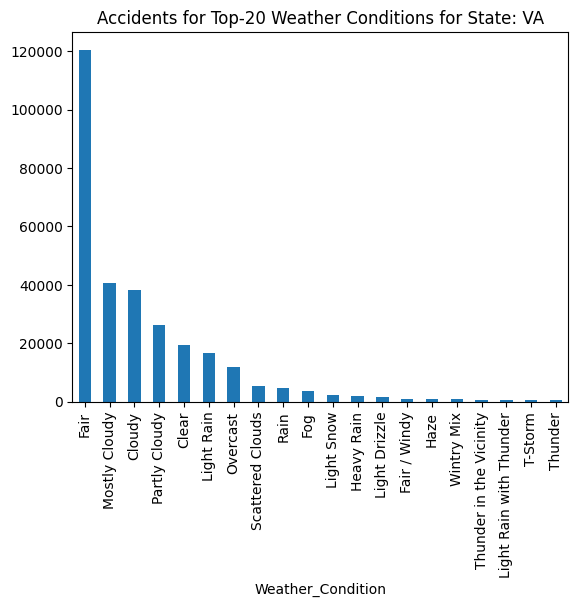

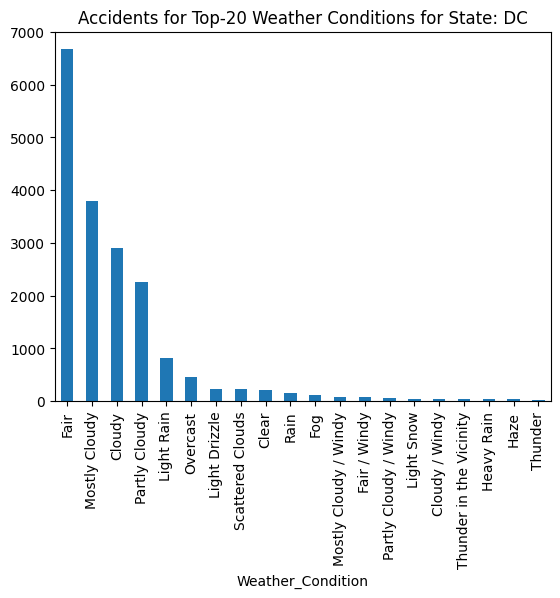

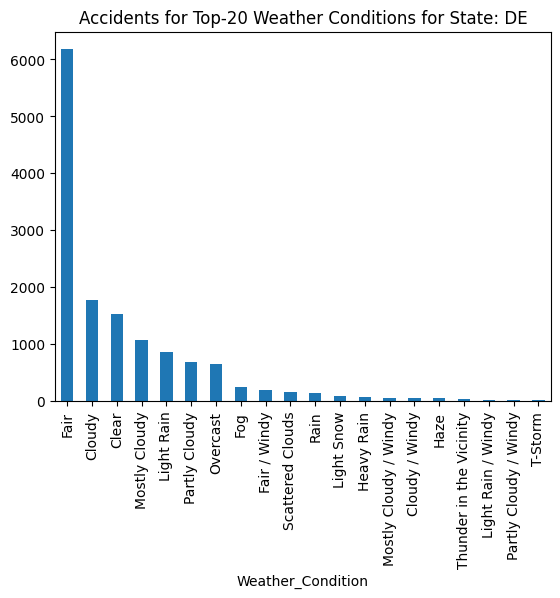

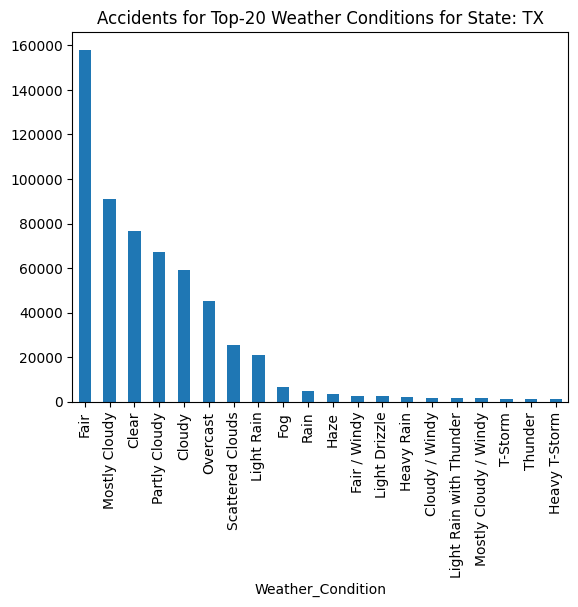

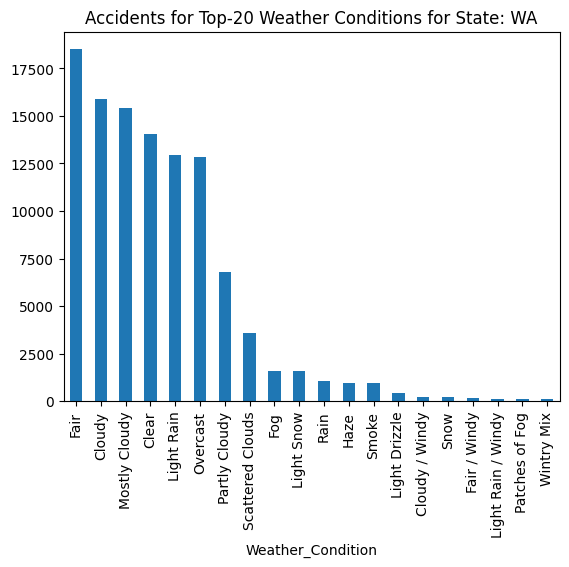

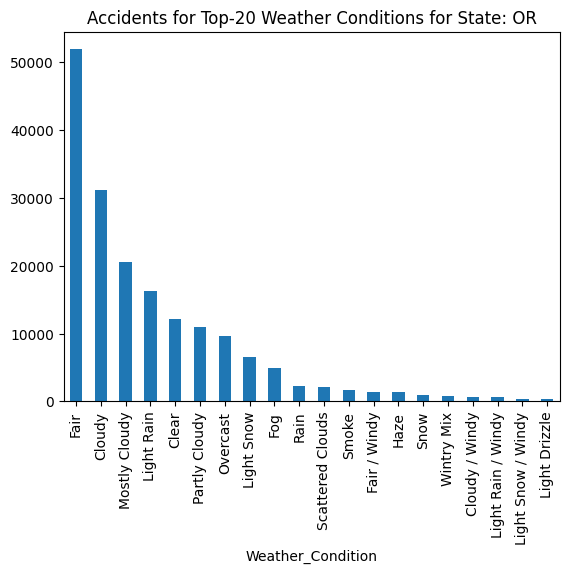

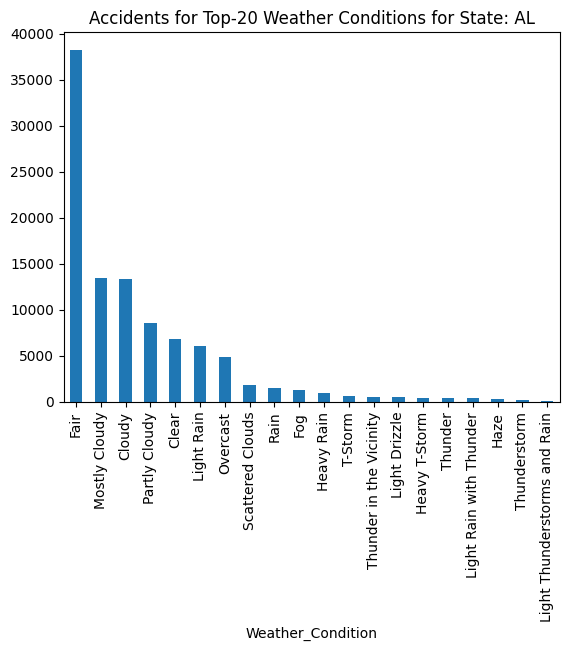

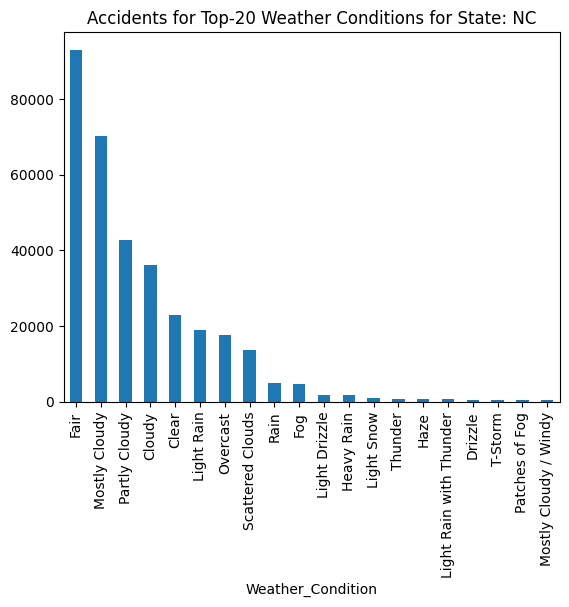

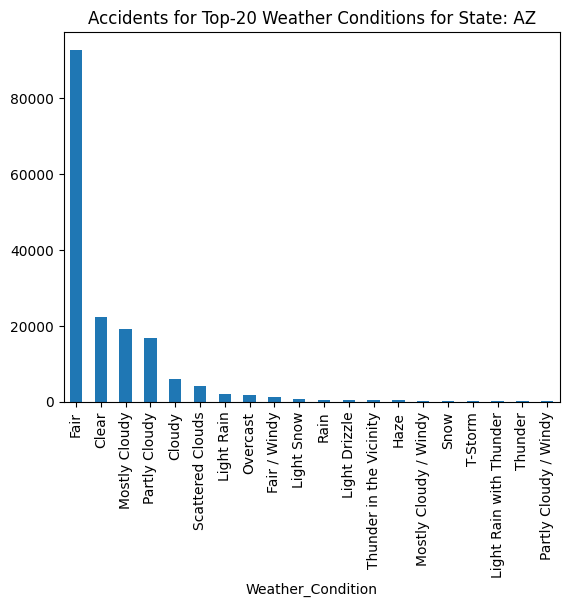

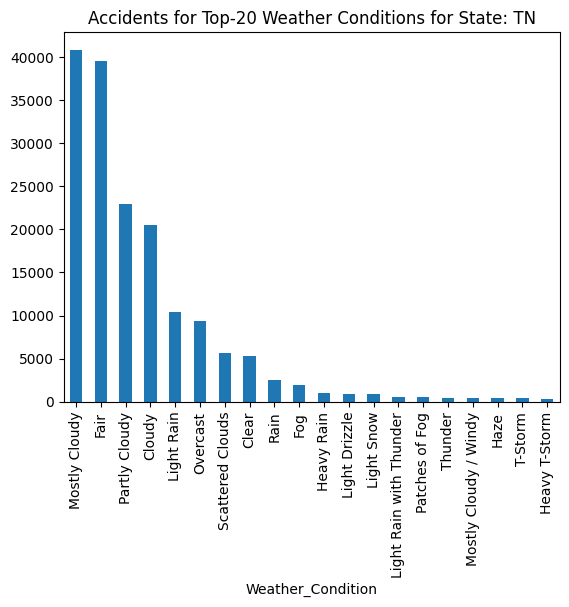

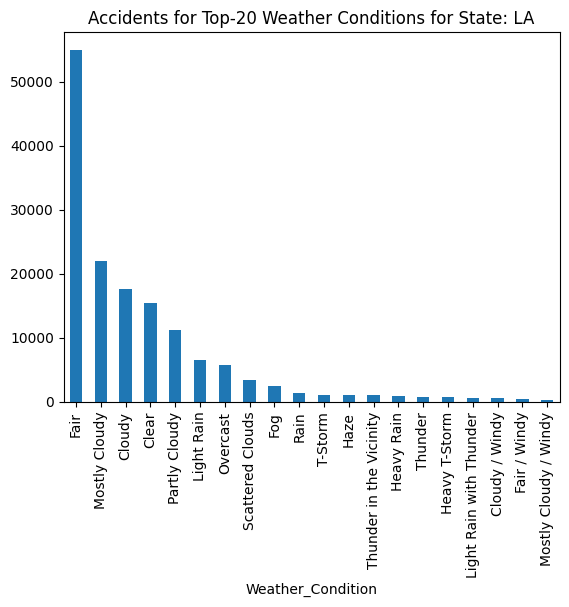

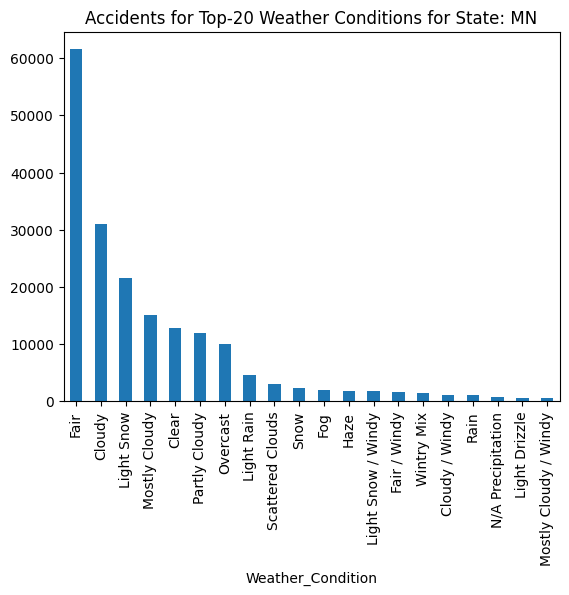

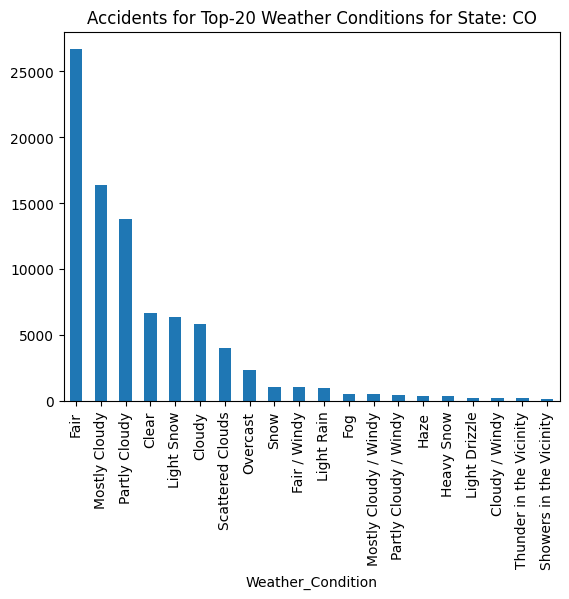

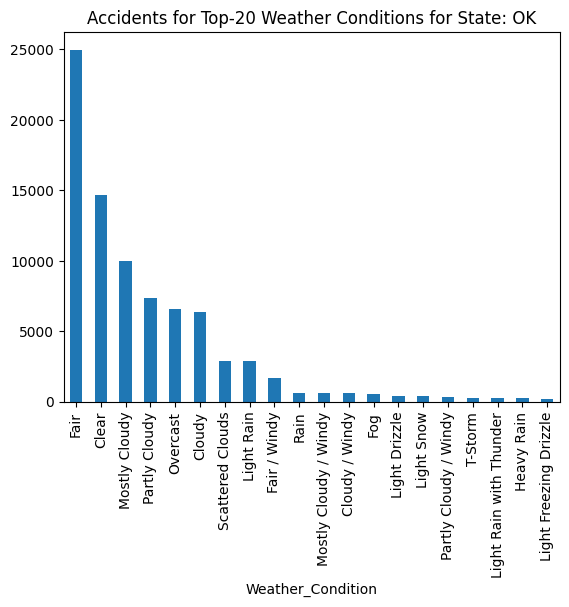

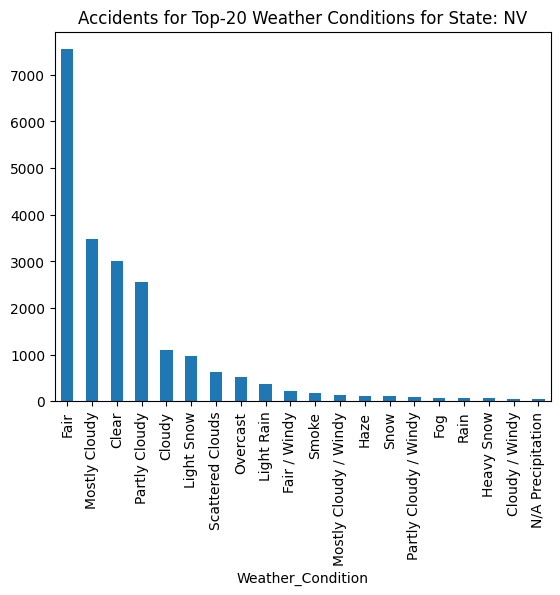

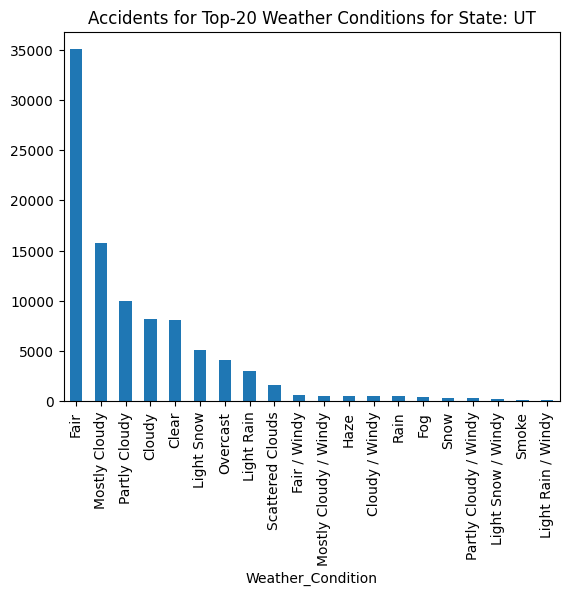

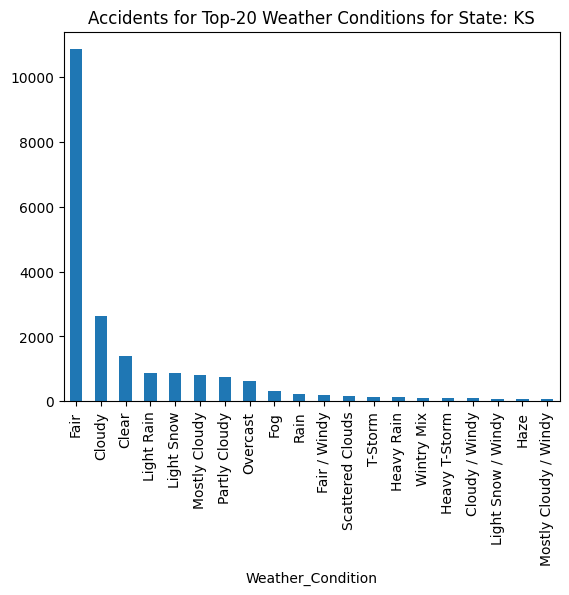

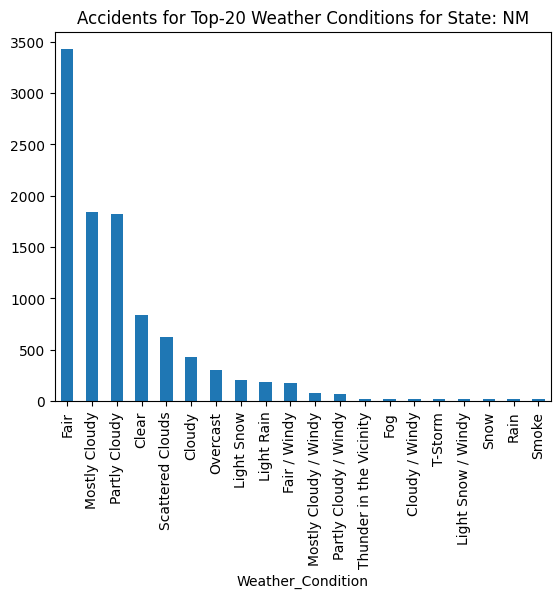

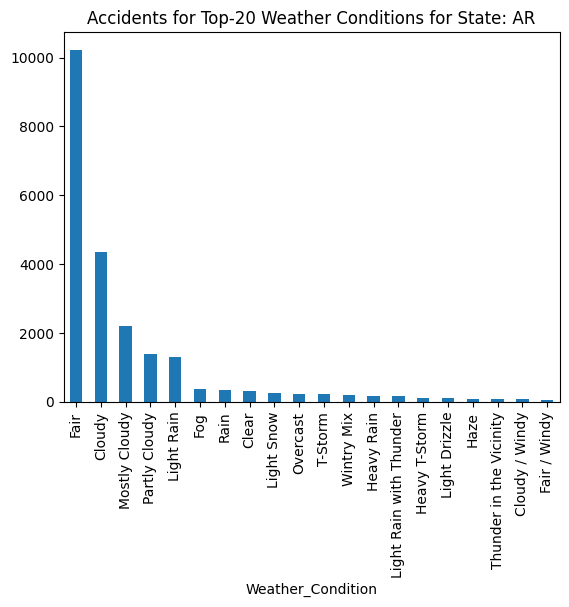

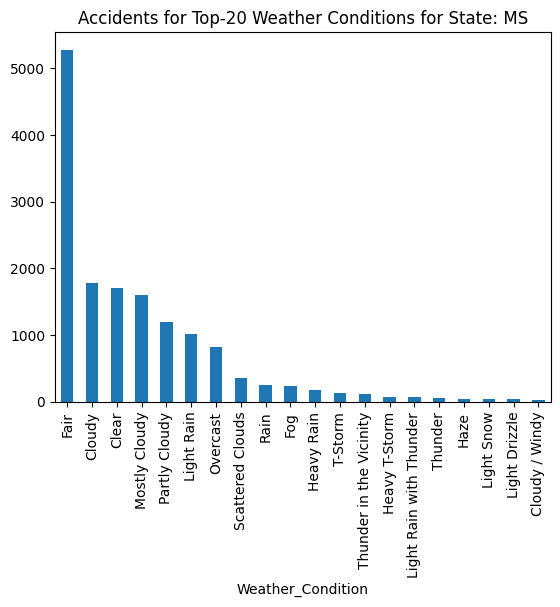

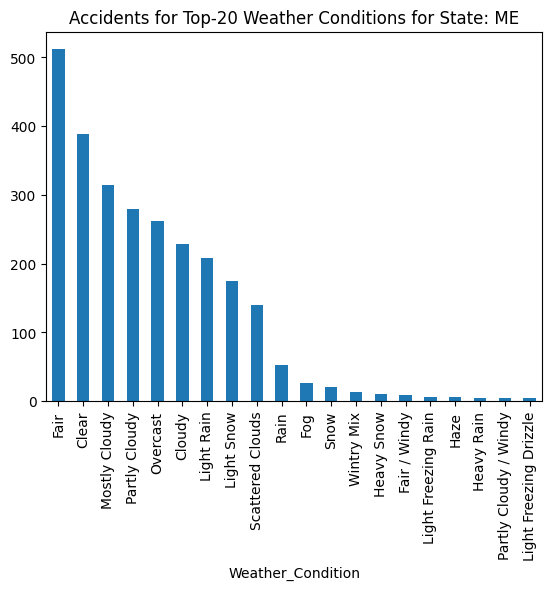

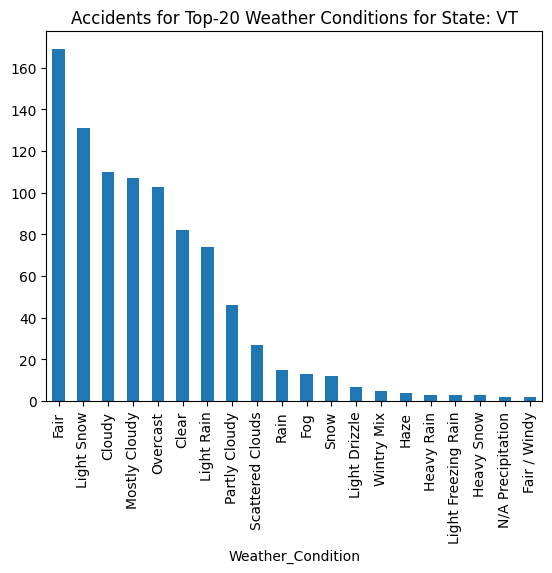

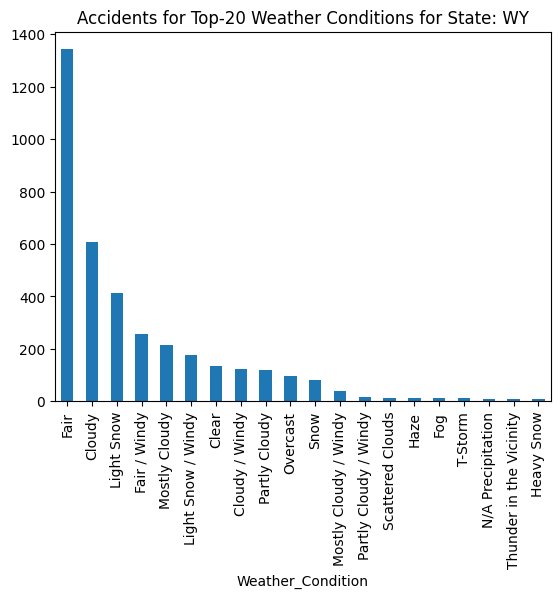

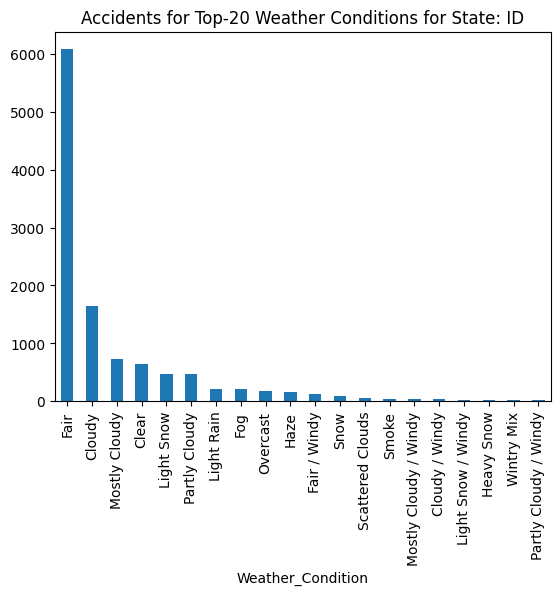

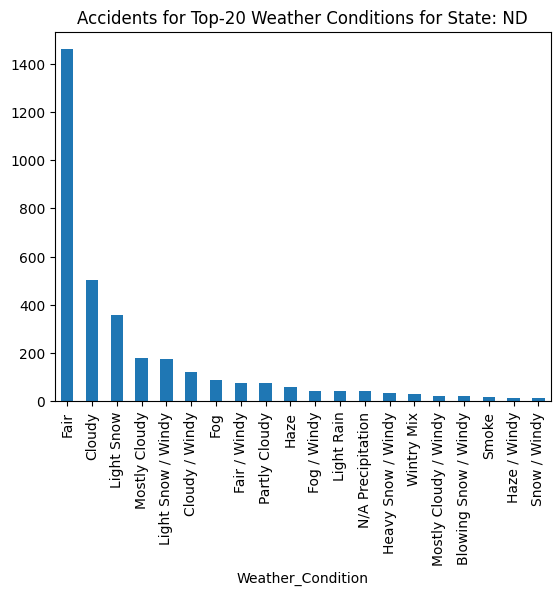

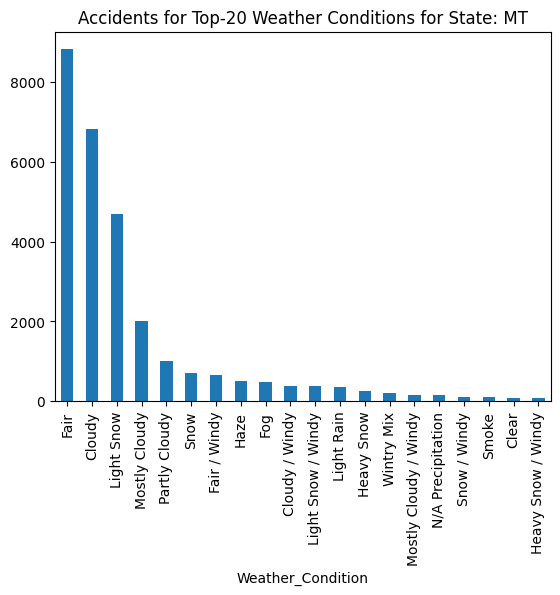

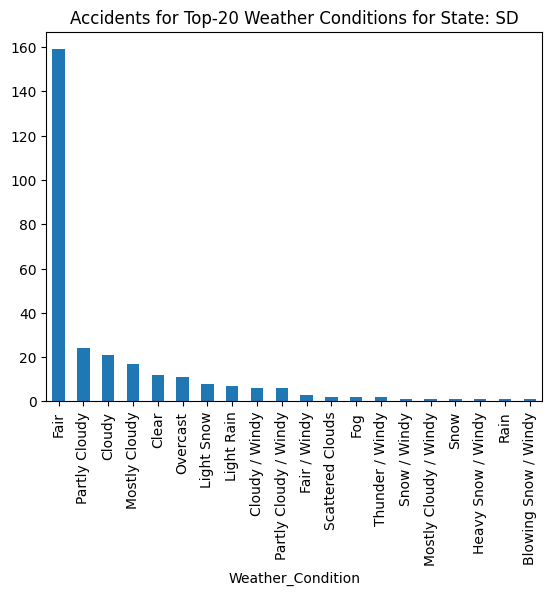

In [78]:
for state in states:
    analysis_df[analysis_df['State']==state].Weather_Condition.value_counts()[:20].plot.bar()
    plt.title(f'Accidents for Top-20 Weather Conditions for State: {state}')
    plt.show()

### Top-3 Insights from States and Weather_Conditions:
#### - OH : Fair > Cloudy > Mostly Cloudy
#### - WV : Fair > Cloudy > Mostly Cloudy
#### - CA : Fair > Clear > Mostly Cloudy
#### - FL : Fair > Mostly Cloudy > Partly Cloudy
#### - GA : Fair > Mostly Cloudy > Clear
#### - SC : Fair > Clear > Cloudy
#### - NE : Clear > Fair > Overcast
#### - IA : Fair > Cloudy > Clear
#### - IL : Fair > Mostly Cloudy > Cloudy
#### - MO : Fair > Cloudy > Mostly Cloudy
#### - WI : Fair > Cloudy > Mostly Cloudy
#### - IN : Fair > Cloudy > Clear
#### - MI : Fair > Cloudy > Clear
#### - NJ : Fair > Mostly Cloudy > Cloudy
#### - NY : Fair > Mostly Cloudy > Cloudy
#### - CT : Fair > Cloudy > Mostly Cloudy
#### - MA : Fair > Mostly Cloudy > Clear
#### - RI : Fair > Mostly Cloudy > Partly Cloudy
#### - NH : Fair > Mostly Cloudy > Clear
#### - PA : Fair > Cloudy > Mostly Cloudy
#### - KY : Fair > Mostly Cloudy > Clear
#### - MD : Fair > Cloudy > Mostly Cloudy
#### - VA : Fair > Mostly Cloudy > Cloudy
#### - DC : Fair > Mostly Cloudy > Cloudy
#### - DE : Fair > Cloudy > Clear
#### - TX : Fair > Mostly Cloudy > Clear
#### - WA : Fair > Cloudy > Mostly Cloudy
#### - OR : Fair > Cloudy > Mostly Cloudy
#### - AL : Fair > Mostly Cloudy > Cloudy
#### - NC : Fair > Mostly Cloudy > Partly Cloudy
#### - AZ : Fair > Clear > Mostly Cloudy 
#### - TN : Mostly Cloudy > Fair > Partly Cloudy
#### - LA : Fair > Mostly Cloudy > Cloudy
#### - MN : Fair > Cloudy > Light Snow
#### - CO : Fair > Mostly Cloudy > Partly Cloudy
#### - OK : Fair > Clear > Mostly Cloudy
#### - NV : Fair > Mostly Cloudy > Clear
#### - UT : Fair > Mostly Cloudy > Partly Cloudy
#### - KS : Fair > Cloudy > Clear
#### - NM : Fair > Mostly Cloudy > Partly Cloudy
#### - AR : Fair > Cloudy > Mostly Cloudy
#### - MS : Fair > Cloudy > Clear
#### - ME : Fair > Clear > Mostly Cloudy
#### - VT : Fair > Light Snow > Cloudy
#### - WY : Fair > Cloudy > Light Snow
#### - ID : Fair > Cloudy > Mostly Cloudy
#### - ND : Fair > Cloudy > Light Snow
#### - MT : Fair > Cloudy > Light Snow
#### - SD : Fair > Partly Cloudy > Cloudy


### Lets also find the relationship of precipitation range and accidents

In [134]:
precep_df = df[['Precipitation(in)']]

In [135]:
precep_df.head(3)

Precipitation(in)
0               0.02
1               0.00
2                NaN

In [136]:
precep_df.describe()

Precipitation(in)
count       5.524808e+06
mean        8.407210e-03
std         1.102246e-01
min         0.000000e+00
25%         0.000000e+00
50%         0.000000e+00
75%         0.000000e+00
max         3.647000e+01

In [137]:
precep_df.isna().sum()

Precipitation(in)    2203586
dtype: int64

In [138]:
precep_df.median()

Precipitation(in)    0.0
dtype: float64

In [139]:
precep_df['Precipitation(in)'].fillna(0.0000001,inplace=True)

/tmp/ipykernel_33/1880922677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  precep_df['Precipitation(in)'].fillna(0.0000001,inplace=True)
/tmp/ipykernel_33/1880922677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precep_df['Precipitation(in)'].fillna(0.0000001,inplace=True)


In [140]:
precep_df['Precipitation(in)'].replace(0.0,0.0000001,inplace=True)
precep_df['Precipitation(in)']

/tmp/ipykernel_33/131899569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  precep_df['Precipitation(in)'].replace(0.0,0.0000001,inplace=True)
/tmp/ipykernel_33/131899569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precep_df['Precipitation(in)'].replace(0.0,0.0000001,inplace=True)


0          2.000000e-02
1          1.000000e-07
2          1.000000e-07
3          1.000000e-07
4          1.000000e-07
               ...     
7728389    1.000000e-07
7728390    1.000000e-07
7728391    1.000000e-07
7728392    1.000000e-07
7728393    1.000000e-07
Name: Precipitation(in), Length: 7728394, dtype: float64

In [141]:
precep_df.isna().sum()

Precipitation(in)    0
dtype: int64

In [142]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 40, 10)]
precep_df['Precipitation(in)'] = pd.cut(precep_df['Precipitation(in)'],np.arange(0,41,10),labels=labels)

/tmp/ipykernel_33/4213518230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precep_df['Precipitation(in)'] = pd.cut(precep_df['Precipitation(in)'],np.arange(0,41,10),labels=labels)


In [143]:
precep_df.head()

Precipitation(in)
0             0 - 9
1             0 - 9
2             0 - 9
3             0 - 9
4             0 - 9

In [146]:
precep_df.value_counts()

Precipitation(in)
0 - 9                7728334
10 - 19                   53
20 - 29                    6
30 - 39                    1
Name: count, dtype: int64

<Axes: ylabel='Precipitation(in)'>

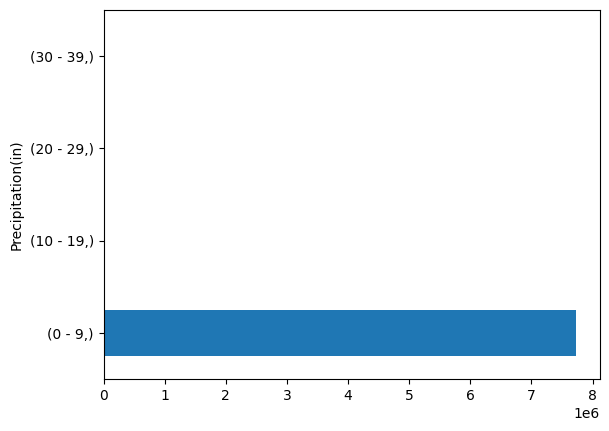

In [145]:
precep_df.value_counts().plot.barh()

#### Insight: Max accidents have happened in the precipitation range of 0-9 inches

In [155]:
state_with_highest_accidents = analysis_df.State.value_counts()[:1].index[0]

In [158]:
county_with_highest_accidents = analysis_df[analysis_df.State == state_with_highest_accidents]['County'].value_counts()[:1].index[0]

In [160]:
city_with_highest_accidents = analysis_df[analysis_df.County == county_with_highest_accidents]['City'].value_counts()[:1].index[0]

In [161]:
analysis_df[analysis_df.City == city_with_highest_accidents]['Street'].value_counts()[:1].index[0]

'I-10 E'

### This analysis gives an interesting answer of street I-10 E(>7000) in the city of Los Angeles under the Los Angeles County in the state of CA while the street of I-95 S has the highest accidents(>10000) in the city of Miami in the Miami-Dande County in the State of FL while in the entire dataset I-95 N has the highest recorded accidents(almost 79000)

#### Finding distribution of accidents across years, days of week, hours of day, hours of weekdays and hours of weekends

In [162]:
accident_timing = df[['Start_Time']]
accident_timing.head()

Start_Time
0  2016-02-08 05:46:00
1  2016-02-08 06:07:59
2  2016-02-08 06:49:27
3  2016-02-08 07:23:34
4  2016-02-08 07:39:07

In [163]:
accident_timing.Start_Time = pd.to_datetime(accident_timing.Start_Time, errors='coerce')

year = accident_timing['Start_Time'].dt.year
month = accident_timing['Start_Time'].dt.month
dayofweek = accident_timing['Start_Time'].dt.dayofweek
hour = accident_timing['Start_Time'].dt.hour
weekday_hour = accident_timing[accident_timing['Start_Time'].dt.dayofweek < 5]['Start_Time'].dt.hour
weekend_hour = accident_timing[accident_timing['Start_Time'].dt.dayofweek >= 5]['Start_Time'].dt.hour

/tmp/ipykernel_33/3242684267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_timing.Start_Time = pd.to_datetime(accident_timing.Start_Time, errors='coerce')


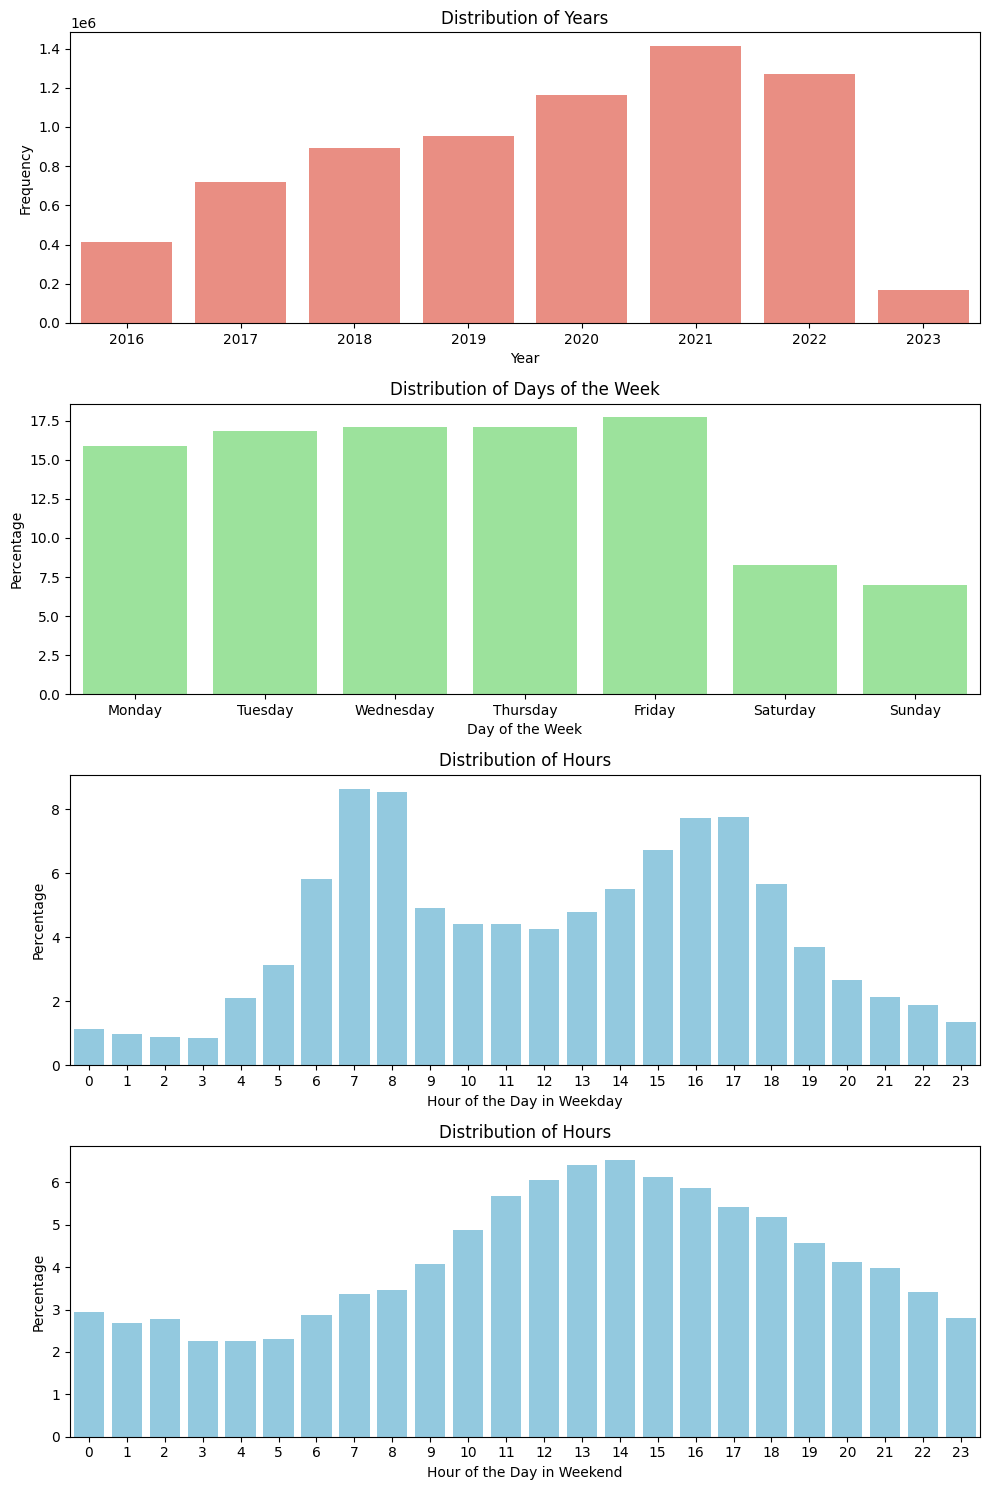

In [164]:
fig, axes = plt.subplots(4, 1, figsize=(10, 15))

year_frequency = (year.value_counts()).sort_index()
sns.barplot(x=year_frequency.index.astype(int), y=year_frequency.values, ax=axes[0], color='salmon')
axes[0].set_title('Distribution of Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_percentage = (dayofweek.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=day_percentage.index, y=day_percentage.values, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Days of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Percentage')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(days)

hour_percentage = (weekday_hour.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=axes[2], color='skyblue')
axes[2].set_title('Distribution of Hours')
axes[2].set_xlabel('Hour of the Day in Weekday')
axes[2].set_ylabel('Percentage')

hour_percentage = (weekend_hour.value_counts(normalize=True) * 100).sort_index()
sns.barplot(x=hour_percentage.index.astype(int), y=hour_percentage.values, ax=axes[3], color='skyblue')
axes[3].set_title('Distribution of Hours')
axes[3].set_xlabel('Hour of the Day in Weekend')
axes[3].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

### Insights:
#### - 2021 and 2022 have witnessed highest amount of accidents.
#### - Most accidents happen during the weekdays. 
#### - Most accidents happen during the rush hours of 7am, 8am, 16pm and 17pm in the weekdays.
#### - Most accidents happen during the midday hours starting from 11am and going uptil 19pm in the evening. 

### Finding what road condition causes most accidents in the top 20 most accident prone states

In [168]:
analysis_df['Traffic_Calming'] = df['Traffic_Calming']

/tmp/ipykernel_33/1656142129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['Traffic_Calming'] = df['Traffic_Calming']


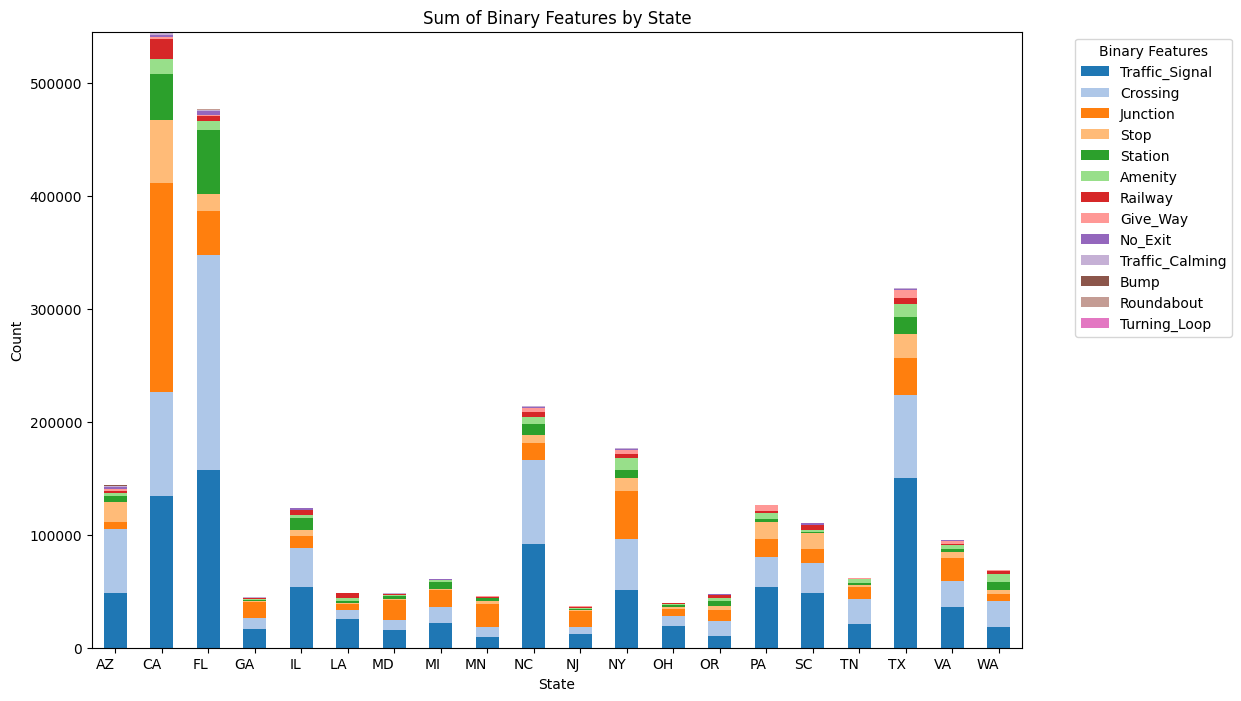

In [169]:
top_states = analysis_df['State'].value_counts().head(20).index
top_states_data = analysis_df[analysis_df['State'].isin(top_states)]

#Calculate sum of each traffic condition for the top states
binary_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                  'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                  'Traffic_Signal', 'Turning_Loop']

binary_sums = {}
for column in binary_columns:
    binary_sums[column] = top_states_data.groupby('State')[column].sum()

# Calculate total sum of each traffic condition across all states
total_sums = pd.Series({col: sums.sum() for col, sums in binary_sums.items()})

# Sort traffic condition by total sum in descending order
sorted_binary_features = total_sums.sort_values(ascending=False)

# Get a color palette 'tab20' with the number of colors equal to the number of binary features
color_palette = plt.get_cmap('tab20')(range(len(sorted_binary_features)))

# Create a dictionary to store the color assignment for each feature
color_mapping = {}

# Assign a color to each feature
for i, feature in enumerate(sorted_binary_features.index):
    color_mapping[feature] = color_palette[i]

#Plot stacked bar plot with each traffic condition having a different color
plt.figure(figsize=(12, 8))
bottom = pd.Series(0, index=top_states)
for column in sorted_binary_features.index:
    sums = binary_sums[column]
    sums.plot(kind='bar', stacked=True, figsize=(12, 8), label=column, bottom=bottom, color=color_mapping[column])
    bottom = bottom.add(sums, fill_value=0)

plt.title('Sum of Binary Features by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Binary Features',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, ha='right')
plt.show()

### Insights:
***
<pre>
 <h4> State    Top-3 Cause of most Accidents </h4>
</pre>
***
<pre>
 <h5> AZ :      Traffic Signal, Crossing, Junction </h5>
</pre>
<pre>
 <h5> CA :      Junction, Crossing, Traffic Signal </h5>
</pre>
<pre>
 <h5> FL :      Crossing, Traffic Signal, Station </h5>
</pre>
<pre>
 <h5> GA :      Traffic Signal, Junction, Crossing </h5>
</pre>
<pre>
 <h5> IL :      Traffic Signal, Crossing, Amenity </h5>
</pre>
<pre>
 <h5> LA :      Traffic Signal, Crossing, Junction </h5>
</pre>
<pre>
 <h5> MD :      Junction, Traffic Signal, Crossing </h5>
</pre>
<pre>
 <h5> MI :      Traffic Signal,Crossing,Junction </h5>
</pre>
<pre>
 <h5> MN :      Traffic Signal, Junction, Crossing </h5>
</pre>
<pre>
 <h5> NC :      Traffic Signal, Crossing, Junction </h5>
</pre>
<pre>
 <h5> NJ :      Junction, Traffic Signal, Crossing </h5>
</pre>
<pre>
 <h5> NY :      Traffic Signal, Crossing, Junction </h5>
</pre>
<pre>
 <h5> OH :      Traffic Signal, Crossing, Junction </h5>
</pre>
<pre>
 <h5> OR :      Crossing, Traffic Signal, Junction </h5>
</pre>
<pre>
 <h5> PA :      Traffic Signal, Crossing, Stop </h5>
</pre>
<pre>
 <h5> SC :      Traffic Signal, Crossing, Stop </h5>
</pre>
<pre>
 <h5> TN :      Crossing, Traffic Signal, Junction </h5>
</pre>
<pre>
 <h5> TX :      Traffic Signal, Crossing, Junction </h5>
</pre>
<pre>
 <h5> VA :      Traffic Signal, Crossing, Junction </h5>
</pre>
<pre>
 <h5> WA :      Crossing, Traffic Signal, Station </h5>
</pre>